In [1]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools

from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 8)

The purpose of this notebook is to verify the LBWSG exposure implementation relative to GBD

In [8]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [113]:
# age_end=0.7672
# exit_age=0.7672
# population_size=100_000

sim = InteractiveContext(path)

2021-10-13 15:50:31.535 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2021-10-13 15:50:31.544 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2021-10-13 15:50:31.545 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2021-10-13 15:50:31.546 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
2021-10-13 15:50:32.233 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline cause_specific_mortality_rate
2021-10-13 15:50:32.236 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mortality_rate
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-

2021-10-13 15:50:36.987 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.1.risk_effect.risk_factor.child_wasting.cause.measles.incidence_rate.adjust_target as modifier to measles.incidence_rate
2021-10-13 15:50:36.988 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.paf.1.lookup_table_38 as modifier to measles.incidence_rate.paf
2021-10-13 15:50:37.198 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.1.risk_effect.risk_factor.child_wasting.cause.lower_respiratory_infections.incidence_rate.adjust_target as modifier to lower_respiratory_infections.incidence_rate
2021-10-13 15:50:37.199 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.paf.1.lookup_table_40 as modifier to lower_respiratory_infections.incidence_rate.paf
2021-10-13 15

2021-10-13 15:50:41.921 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.incidence_rate
2021-10-13 15:50:41.922 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.incidence_rate.paf
2021-10-13 15:50:42.047 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.dwell_time
2021-10-13 15:50:42.048 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.disability_weight
2021-10-13 15:50:42.049 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering disability_weight.4.mild_child_wasting.disability_weight as modifier to disability_weight
2021-10-13 15:50:42.050 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate
2021-10-13 15:50:42.

In [114]:
pop0 = sim.get_population()
pop0

,tracked,cause_of_death,years_of_life_lost,sex,entrance_time,alive,exit_time,age,location,short_gestation_propensity,...,measles,measles_event_count,measles_event_time,susceptible_to_measles_event_count,susceptible_to_measles_event_time,diarrheal_diseases,diarrheal_diseases_event_time,diarrheal_diseases_event_count,susceptible_to_diarrheal_diseases_event_count,susceptible_to_diarrheal_diseases_event_time
0,True,not_dead,0.0,Male,2021-12-31 12:00:00,alive,NaT,0.385333,Ethiopia,0.063057,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT
1,True,not_dead,0.0,Male,2021-12-31 12:00:00,alive,NaT,0.402936,Ethiopia,0.940822,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT
2,True,not_dead,0.0,Female,2021-12-31 12:00:00,alive,NaT,0.476724,Ethiopia,0.603078,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT
3,True,not_dead,0.0,Female,2021-12-31 12:00:00,alive,NaT,0.750445,Ethiopia,0.388323,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,not_dead,0.0,Male,2021-12-31 12:00:00,alive,NaT,0.532615,Ethiopia,0.375500,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT
99997,True,not_dead,0.0,Male,2021-12-31 12:00:00,alive,NaT,0.377171,Ethiopia,0.317812,...,susceptible_to_measles,0,NaT,0,NaT,diarrheal_diseases,2021-12-31 12:00:00,0,0,NaT
99998,True,not_dead,0.0,Male,2021-12-31 12:00:00,alive,NaT,0.589489,Ethiopia,0.057284,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT
99999,True,not_dead,0.0,Male,2021-12-31 12:00:00,alive,NaT,0.120019,Ethiopia,0.496364,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,NaT,0,0,NaT


In [11]:
data = pd.concat([pop0.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop0.index),
                 sim.get_value('low_birth_weight.exposure')(pop0.index)], axis=1)
data['age_group'] = np.where(data.age<6/365,'early_neonatal',
                           np.where(data.age<28/365,'late_neonatal',
                                   np.where(data.age<1,'post_neonatal', '1_to_5')))
data

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,age_group
0,0.385333,Male,cat30,2365.677780,post_neonatal
1,0.402936,Male,cat51,3246.844438,post_neonatal
2,0.476724,Female,cat55,3891.425547,post_neonatal
3,0.750445,Female,cat54,3622.807579,post_neonatal
...,...,...,...,...,...
99996,0.532615,Male,cat56,4159.053368,post_neonatal
99997,0.377171,Male,cat50,3689.764802,post_neonatal
99998,0.589489,Male,cat54,3592.632730,post_neonatal
99999,0.120019,Male,cat55,3925.220890,post_neonatal


# Load artifact data

In [12]:
[c for c in art.keys if 'gestation' in c]

['risk_factor.low_birth_weight_and_short_gestation.exposure',
 'risk_factor.low_birth_weight_and_short_gestation.distribution',
 'risk_factor.low_birth_weight_and_short_gestation.categories']

In [13]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2019', f'age_end <= 5'])

In [16]:
art_exposure = art.load(f'risk_factor.low_birth_weight_and_short_gestation.exposure')['draw_0'].reset_index()
art_cats = art.load(f'risk_factor.low_birth_weight_and_short_gestation.categories')
art_exposure['bw_start'] = np.nan
art_exposure['bw_end'] = np.nan
art_exposure['ga_start'] = np.nan
art_exposure['ga_end'] = np.nan
for i in art_exposure.index:
    art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
    art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
    art_exposure['ga_start'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(', ')[0]
    art_exposure['ga_end'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(') wks')[0].split(', ')[1]
    
art_exposure['bw_mid'] = (art_exposure.bw_end - art_exposure.bw_start)/2 + art_exposure.bw_start
art_exposure['ga_mid'] = (art_exposure.ga_end - art_exposure.ga_start)/2 + art_exposure.ga_start
art_exposure

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,sex,age_start,age_end,year_start,year_end,parameter,draw_0,bw_start,bw_end,ga_start,ga_end,bw_mid,ga_mid
0,Female,-1.000000,0.000000,2019,2020,cat10,0.001853,500.0,1000.0,24.0,26.0,750.0,25.0
1,Female,-1.000000,0.000000,2019,2020,cat106,0.000644,1000.0,1500.0,36.0,37.0,1250.0,36.5
2,Female,-1.000000,0.000000,2019,2020,cat11,0.001160,500.0,1000.0,26.0,28.0,750.0,27.0
3,Female,-1.000000,0.000000,2019,2020,cat116,0.001423,1000.0,1500.0,38.0,40.0,1250.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Male,0.019178,0.076712,2019,2020,cat89,0.001273,3000.0,3500.0,30.0,32.0,3250.0,31.0
345,Male,0.019178,0.076712,2019,2020,cat90,0.000562,3500.0,4000.0,30.0,32.0,3750.0,31.0
346,Male,0.019178,0.076712,2019,2020,cat95,0.003673,3000.0,3500.0,32.0,34.0,3250.0,33.0
347,Male,0.019178,0.076712,2019,2020,cat96,0.002109,3500.0,4000.0,32.0,34.0,3750.0,33.0


In [17]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [19]:
sim_data = (data.rename(columns={'risk_factor.low_birth_weight_and_short_gestation_exposure':'parameter'})
            .merge(art_exposure.loc[(art_exposure.sex=='Female') & (art_exposure.age_end==0)]
                   [['parameter','bw_end','bw_start','bw_mid','ga_mid']], on=['parameter']))
assert np.all((sim_data['risk_factor.low_birth_weight.exposure'] < sim_data.bw_end)
              & (sim_data['risk_factor.low_birth_weight.exposure'] > sim_data.bw_start))
sim_data['count'] = 1
sim_data

,age,sex,parameter,risk_factor.low_birth_weight.exposure,age_group,bw_end,bw_start,bw_mid,ga_mid,count
0,0.385333,Male,cat30,2365.677780,post_neonatal,2500.0,2000.0,2250.0,33.0,1
1,0.205018,Female,cat30,2403.304290,post_neonatal,2500.0,2000.0,2250.0,33.0,1
2,0.499690,Male,cat30,2489.736078,post_neonatal,2500.0,2000.0,2250.0,33.0,1
3,0.648287,Female,cat30,2335.842253,post_neonatal,2500.0,2000.0,2250.0,33.0,1
...,...,...,...,...,...,...,...,...,...,...
99996,0.006733,Female,cat14,786.757204,early_neonatal,1000.0,500.0,750.0,31.0,1
99997,0.676396,Male,cat14,771.945133,post_neonatal,1000.0,500.0,750.0,31.0,1
99998,0.716489,Male,cat14,796.156142,post_neonatal,1000.0,500.0,750.0,31.0,1
99999,0.379876,Female,cat2,326.676713,post_neonatal,500.0,0.0,250.0,12.0,1


In [22]:
test = sim_data.groupby(['sex','age_group','parameter','bw_mid','ga_mid']).sum()[['count']]
test_tot = sim_data.groupby(['sex','age_group']).sum()[['count']]
prev = (test/test_tot).reset_index()
prev

,sex,age_group,ga_mid,parameter,bw_mid,count
0,Female,early_neonatal,25.0,cat10,750.0,0.000979
1,Female,early_neonatal,36.5,cat106,1250.0,0.003918
2,Female,early_neonatal,39.0,cat116,1250.0,0.000979
3,Female,early_neonatal,39.0,cat117,1750.0,0.002938
...,...,...,...,...,...,...
324,Male,post_neonatal,31.0,cat89,3250.0,0.001213
325,Male,post_neonatal,31.0,cat90,3750.0,0.000520
326,Male,post_neonatal,33.0,cat95,3250.0,0.003097
327,Male,post_neonatal,33.0,cat96,3750.0,0.001862


In [174]:
def bar_chart(sex, age_group, log=True):
    if age_group=='early_neonatal':
        age_end=0.07671233
    else:
        age_end=0.01917808
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_end==age_end)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev1.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
         .sort_values(by='draw_0'))

    barWidth = 0.4
    a = np.arange(len(p))
    b = [x + barWidth for x in a]
    plt.figure(dpi=200)
    plt.bar(a, p.draw_0, width=barWidth, label='Artifact')
    plt.bar(b, p['count'], width=barWidth, label='Simulation')
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlabel('LBSWG category')
    if log==True:
        plt.semilogy()
    plt.xticks([])
    plt.title(f'{age_group} {sex} at initialization')

In [127]:
def plot_exposure_heat_map(sex, age_group):
    if age_group=='early_neonatal':
        age_end=0.07671233
    else:
        age_end=0.01917808
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_end==age_end)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
    p = p.replace(np.nan, 0)
    s = p.pivot_table(index='ga_mid', columns='bw_mid', values='count').sort_index(ascending=False)
    #s = s * 100
    s = s.replace(0,np.nan)
    s=np.log(s/(1-s))
    a = p.pivot_table(index='ga_mid', columns='bw_mid', values='draw_0').sort_index(ascending=False)
    #a = a * 100
    a = a.replace(0,np.nan)
    a=np.log(a/(1-a))
    fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
    sns.heatmap(s, ax=ax1,annot=True,cmap="PiYG",vmin=-11,vmax=-1.5)
    sns.heatmap(a, ax=ax2,annot=True,cmap="PiYG",vmin=-11,vmax=-1.5)
    ax1.set_title('Simulation')
    ax2.set_title('Artifact')
    for ax in [ax1,ax2]:
        ax.set_xlabel('Birthweight midpoint (g)')
        ax.set_ylabel('Gestational age midpoint (weeks)')
    plt.subplots_adjust(right=1.8, top=1)    
    plt.suptitle(f'{age_group} {sex}s\nLogit-transformed LBWSG exposure distribution at initialization',
                x=0.9, y=1.2)

# run sim for 40 days

In [115]:
sim.run()

2021-10-13 15:50:56.100 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 00:00:00
2021-10-13 15:51:11.622 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 12:00:00
2021-10-13 15:51:28.943 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 00:00:00
2021-10-13 15:51:47.142 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 12:00:00
2021-10-13 15:52:07.693 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-03 00:00:00
2021-10-13 15:52:22.765 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-03 12:00:00
2021-10-13 15:52:39.388 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-04 00:00:00
2021-10-13 15:52:52.793 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-04 12:00:00
2021-10-13 15:53:05.517 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-05 00:00:00
2021-10-13 15:53:20.202 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-05 12:00:00
2021-10-13 15:53:33.593 | DEBUG    | vivarium.framework.engi

80

In [118]:
pop1 = sim.get_population()

In [119]:
data1 = pd.concat([pop1.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop1.index),
                 sim.get_value('low_birth_weight.exposure')(pop1.index)], axis=1)
data1['age_group'] = np.where(data1.age<6/365,'early_neonatal',
                           np.where(data1.age<28/365,'late_neonatal',
                                   np.where(data1.age<1,'post_neonatal', '1_to_5')))
data1

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,age_group
0,0.494847,Male,cat30,2365.677780,post_neonatal
1,0.512450,Male,cat51,3246.844438,post_neonatal
2,0.586238,Female,cat55,3891.425547,post_neonatal
4,0.725409,Female,cat47,3645.286213,post_neonatal
...,...,...,...,...,...
114599,0.000988,Male,cat23,1345.624587,early_neonatal
114600,0.000534,Male,cat51,3297.730230,early_neonatal
114601,0.000366,Male,cat46,4270.858380,early_neonatal
114602,0.001304,Male,cat55,3614.421675,early_neonatal


In [120]:
sim_data1 = (data1.rename(columns={'risk_factor.low_birth_weight_and_short_gestation_exposure':'parameter'})
            .merge(art_exposure.loc[(art_exposure.sex=='Female') & (art_exposure.age_end==0)]
                   [['parameter','bw_end','bw_start','bw_mid','ga_mid']], on=['parameter']))
assert np.all((sim_data1['risk_factor.low_birth_weight.exposure'] < sim_data1.bw_end)
              & (sim_data1['risk_factor.low_birth_weight.exposure'] > sim_data1.bw_start))
sim_data1['count'] = 1
sim_data1

,age,sex,parameter,risk_factor.low_birth_weight.exposure,age_group,bw_end,bw_start,bw_mid,ga_mid,count
0,0.494847,Male,cat30,2365.677780,post_neonatal,2500.0,2000.0,2250.0,33.0,1
1,0.314532,Female,cat30,2403.304290,post_neonatal,2500.0,2000.0,2250.0,33.0,1
2,0.609204,Male,cat30,2489.736078,post_neonatal,2500.0,2000.0,2250.0,33.0,1
3,0.757801,Female,cat30,2335.842253,post_neonatal,2500.0,2000.0,2250.0,33.0,1
...,...,...,...,...,...,...,...,...,...,...
100501,0.016385,Male,cat14,994.619739,early_neonatal,1000.0,500.0,750.0,31.0,1
100502,0.013806,Female,cat14,757.058958,early_neonatal,1000.0,500.0,750.0,31.0,1
100503,0.009687,Female,cat14,505.988939,early_neonatal,1000.0,500.0,750.0,31.0,1
100504,0.489390,Female,cat2,326.676713,post_neonatal,500.0,0.0,250.0,12.0,1


In [153]:
prev_num1 = sim_data1.groupby(['sex','age_group','parameter','bw_mid','ga_mid']).sum()[['count']]
prev_den1 = sim_data1.groupby(['sex','age_group']).sum()[['count']]
prev1 = (prev_num1/prev_den1).reset_index()
prev

,sex,age_group,ga_mid,parameter,bw_mid,count
0,Female,early_neonatal,25.0,cat10,750.0,0.000979
1,Female,early_neonatal,36.5,cat106,1250.0,0.003918
2,Female,early_neonatal,39.0,cat116,1250.0,0.000979
3,Female,early_neonatal,39.0,cat117,1750.0,0.002938
...,...,...,...,...,...,...
324,Male,post_neonatal,31.0,cat89,3250.0,0.001213
325,Male,post_neonatal,31.0,cat90,3750.0,0.000520
326,Male,post_neonatal,33.0,cat95,3250.0,0.003097
327,Male,post_neonatal,33.0,cat96,3750.0,0.001862


In [171]:
def bar_chart_40_days(sex, age_group, log=True):
    if age_group=='early_neonatal':
        age_end=0.07671233
    else:
        age_end=0.01917808
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_end==age_end)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev1.loc[(prev1.sex==sex)&(prev1.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
         .sort_values(by='draw_0'))

    barWidth = 0.4
    a = np.arange(len(p))
    b = [x + barWidth for x in a]
    plt.figure(dpi=200)
    plt.bar(a, p.draw_0, width=barWidth, label='Artifact')
    plt.bar(b, p['count'], width=barWidth, label='Simulation')
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlabel('LBSWG category')
    if log==True:
        plt.semilogy()
    plt.xticks([])
    plt.title(f'{age_group} {sex} at 40 days')
    
for sex in ['Male','Female']:
    for age_group in ['early_neonatal','late_neonatal']:
        for log in [True,False]:
            bar_chart_40_days(sex, age_group, log=log)

In [129]:
def plot_exposure_heat_map_40_days(sex, age_group):
    if age_group=='early_neonatal':
        age_end=0.07671233
    else:
        age_end=0.01917808
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_end==age_end)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev1.loc[(prev1.sex==sex)&(prev1.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
    p = p.replace(np.nan, 0)
    s = p.pivot_table(index='ga_mid', columns='bw_mid', values='count').sort_index(ascending=False)
    #s = s * 100
    s = s.replace(0,np.nan)
    s=np.log(s/(1-s))
    a = p.pivot_table(index='ga_mid', columns='bw_mid', values='draw_0').sort_index(ascending=False)
    #a = a * 100
    a = a.replace(0,np.nan)
    a=np.log(a/(1-a))
    fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
    sns.heatmap(s, ax=ax1,annot=True,cmap="PiYG",vmin=-11,vmax=-1.5)
    sns.heatmap(a, ax=ax2,annot=True,cmap="PiYG",vmin=-11,vmax=-1.5)
    ax1.set_title('Simulation')
    ax2.set_title('Artifact')
    for ax in [ax1,ax2]:
        ax.set_xlabel('Birthweight midpoint (g)')
        ax.set_ylabel('Gestational age midpoint (weeks)')
    plt.subplots_adjust(right=1.8, top=1)    
    plt.suptitle(f'{age_group} {sex}s\nLogit-transformed LBWSG exposure distribution at 40 days',
                x=0.9, y=1.2)

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


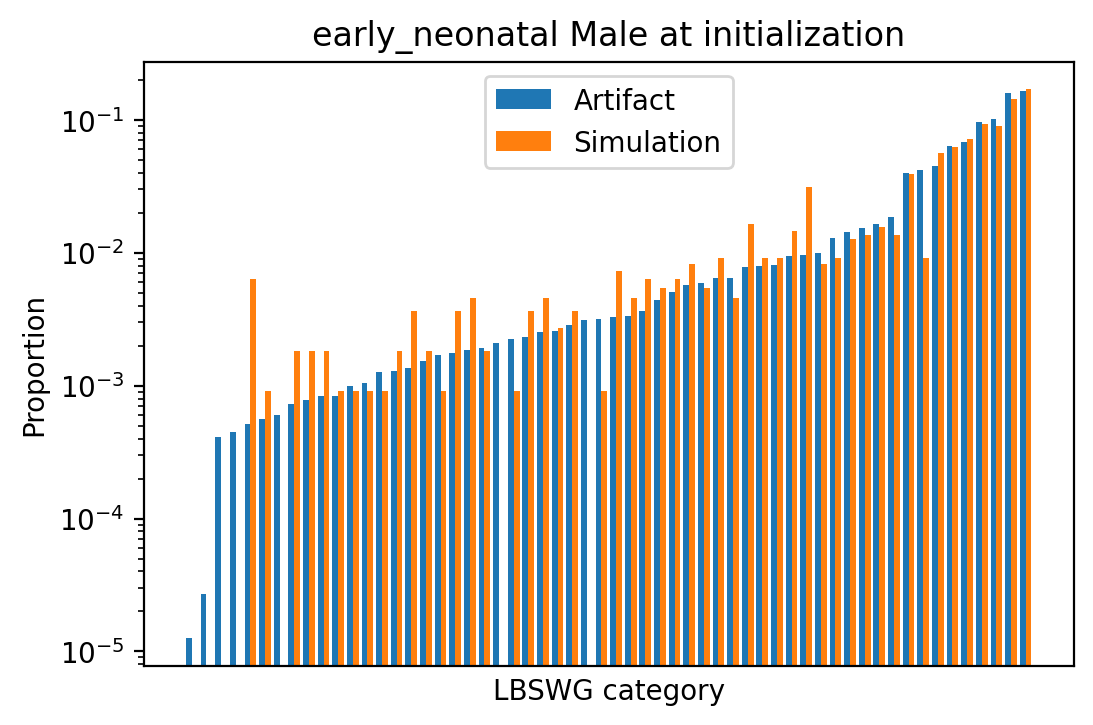

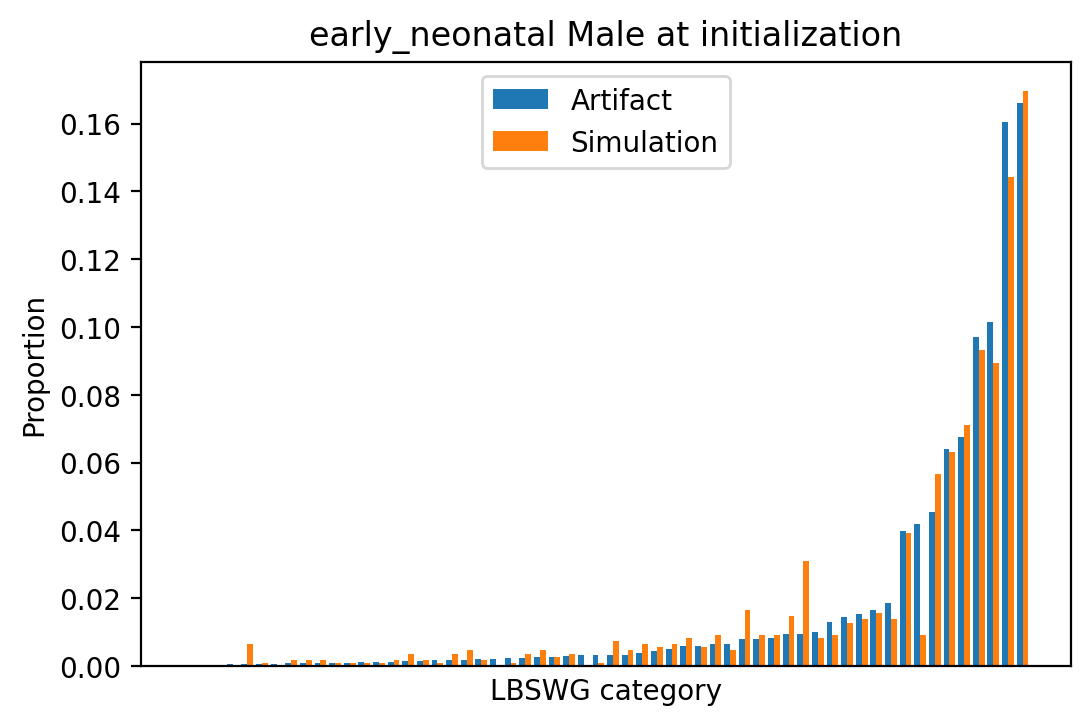

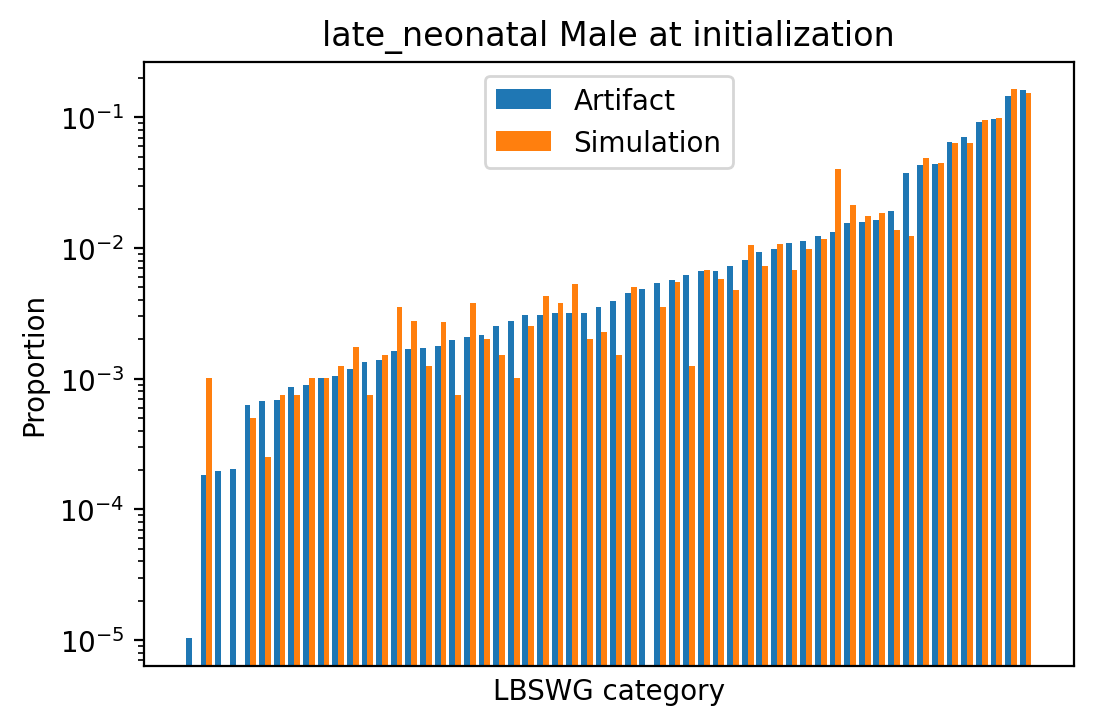

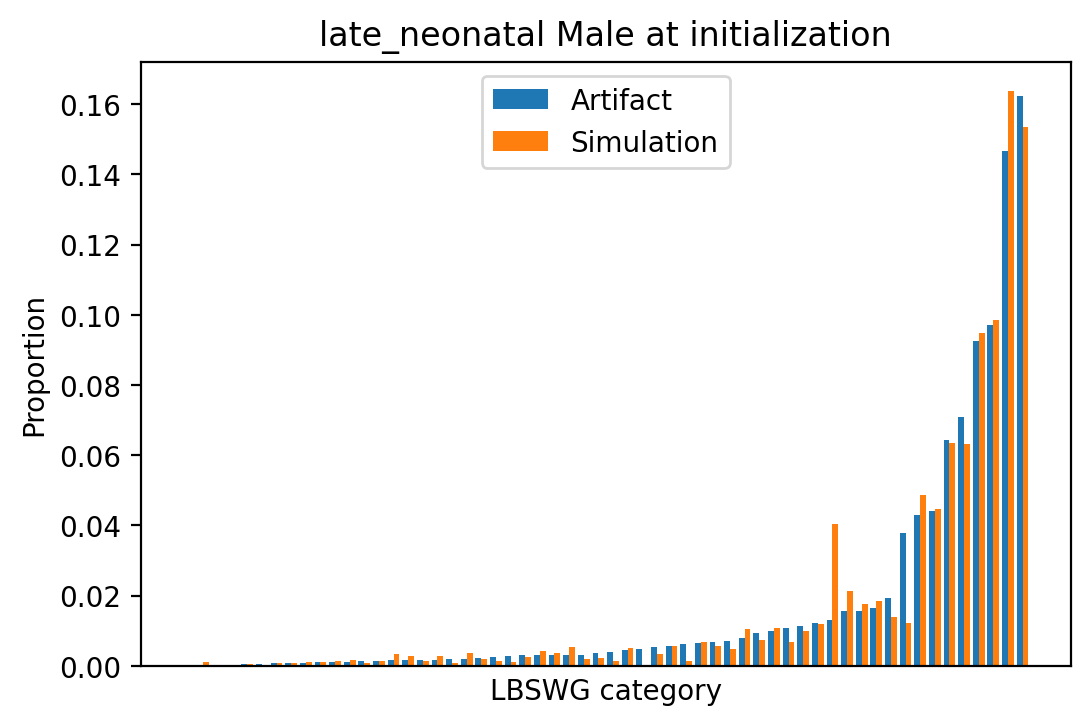

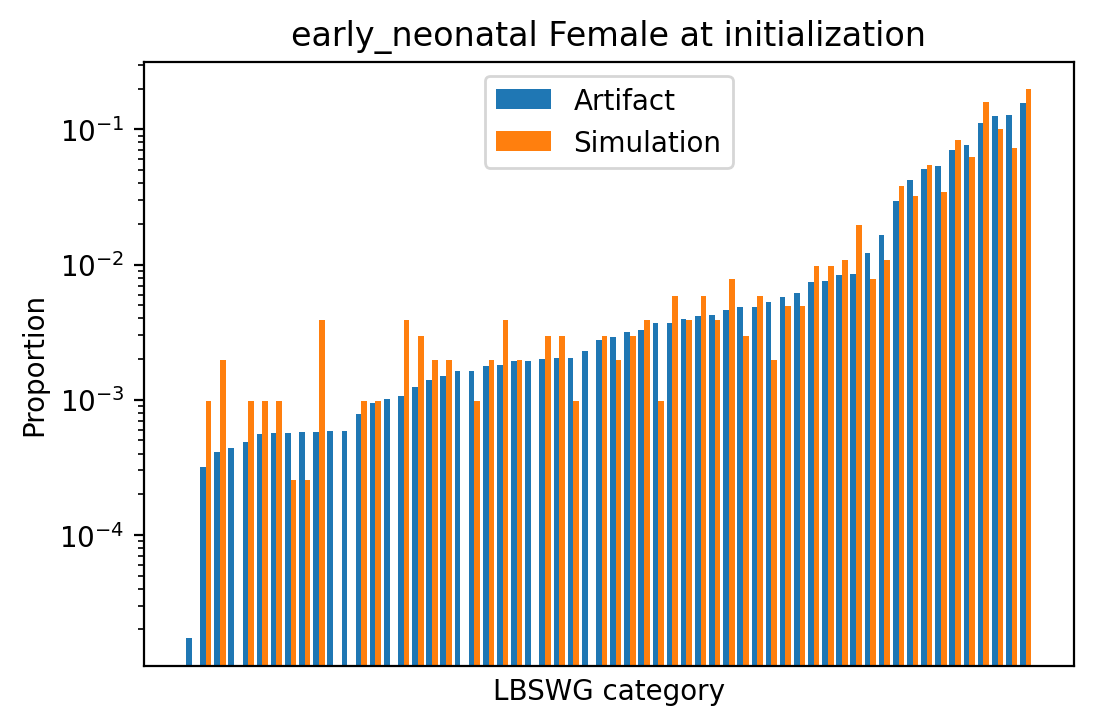

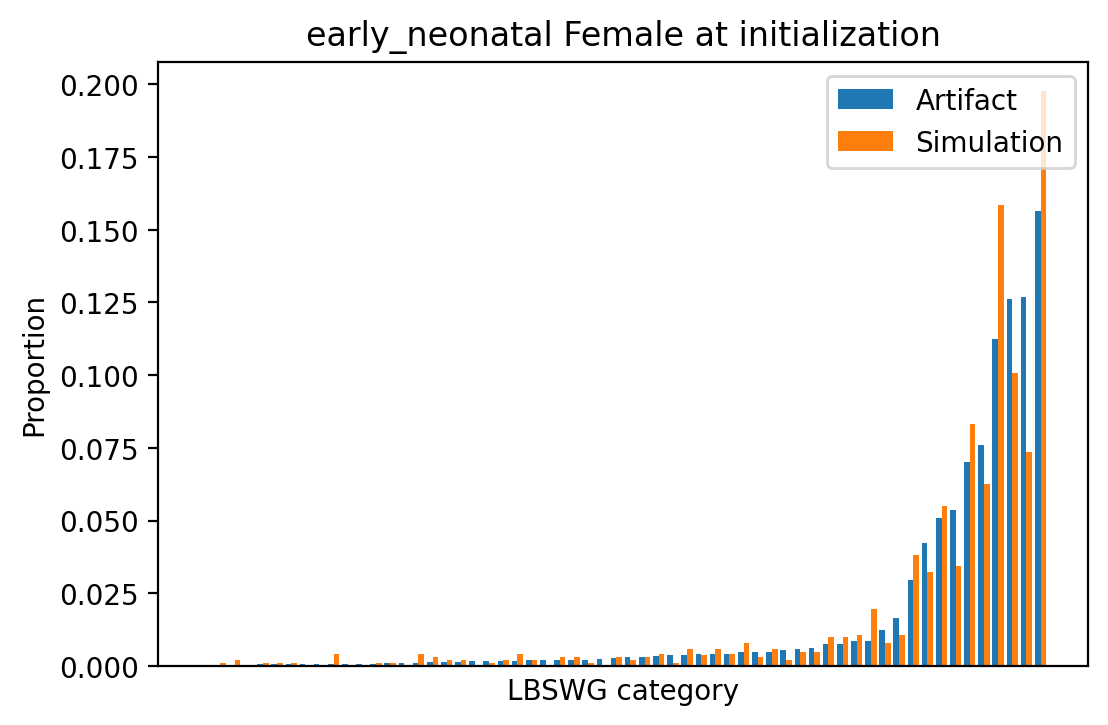

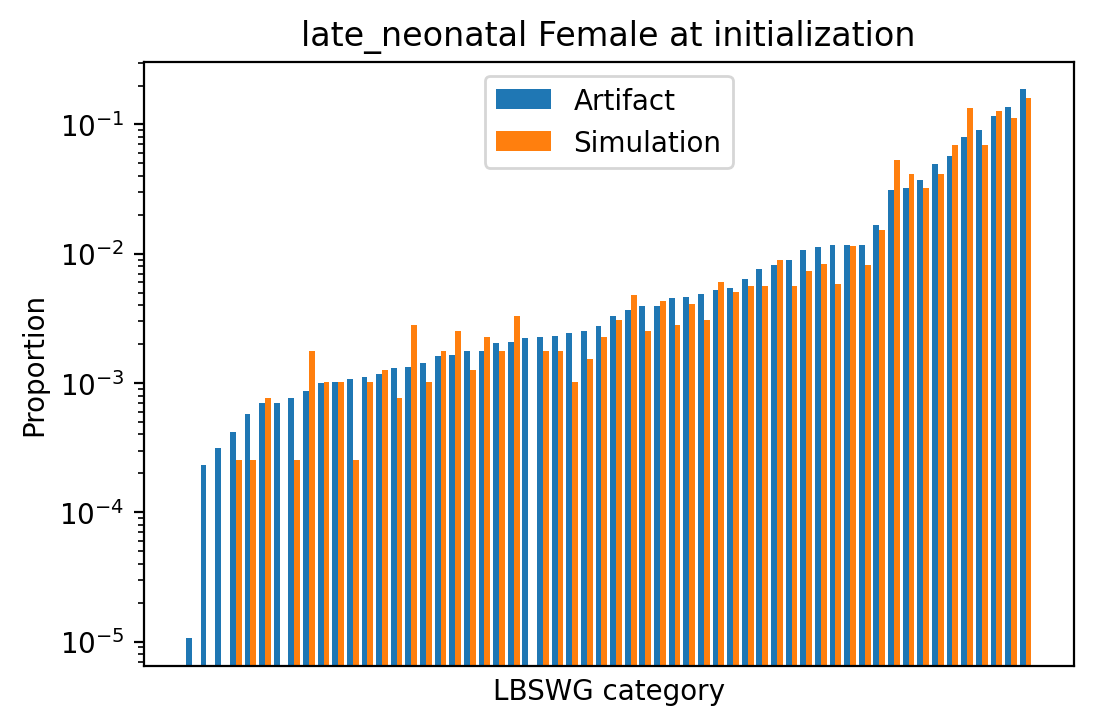

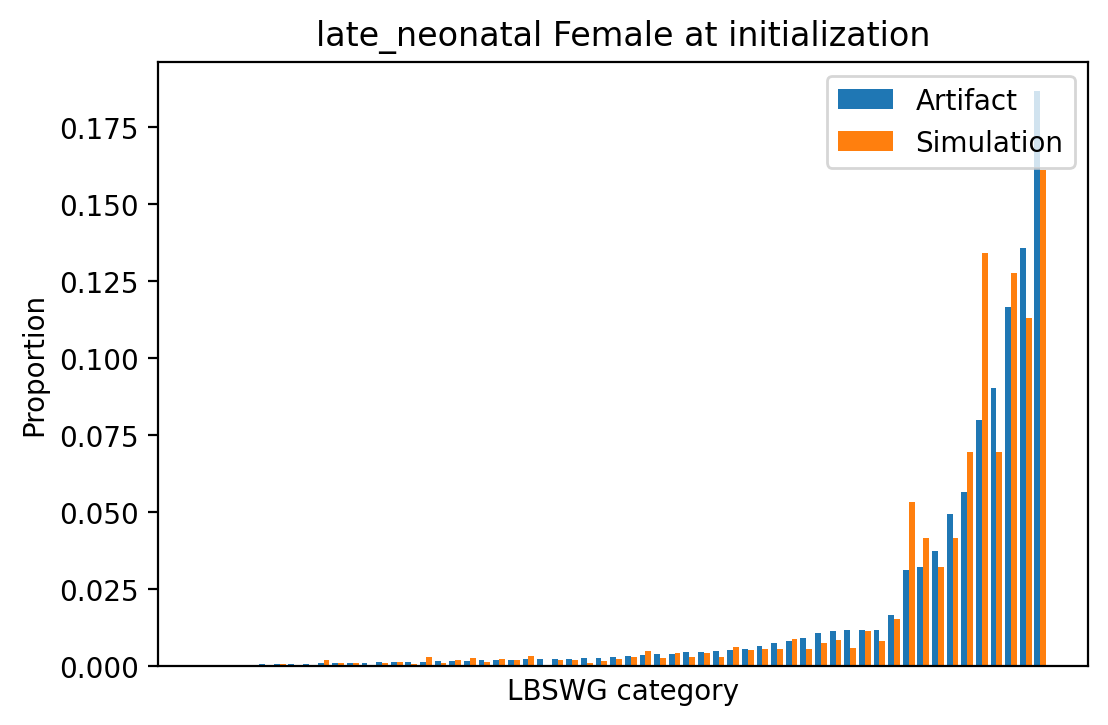

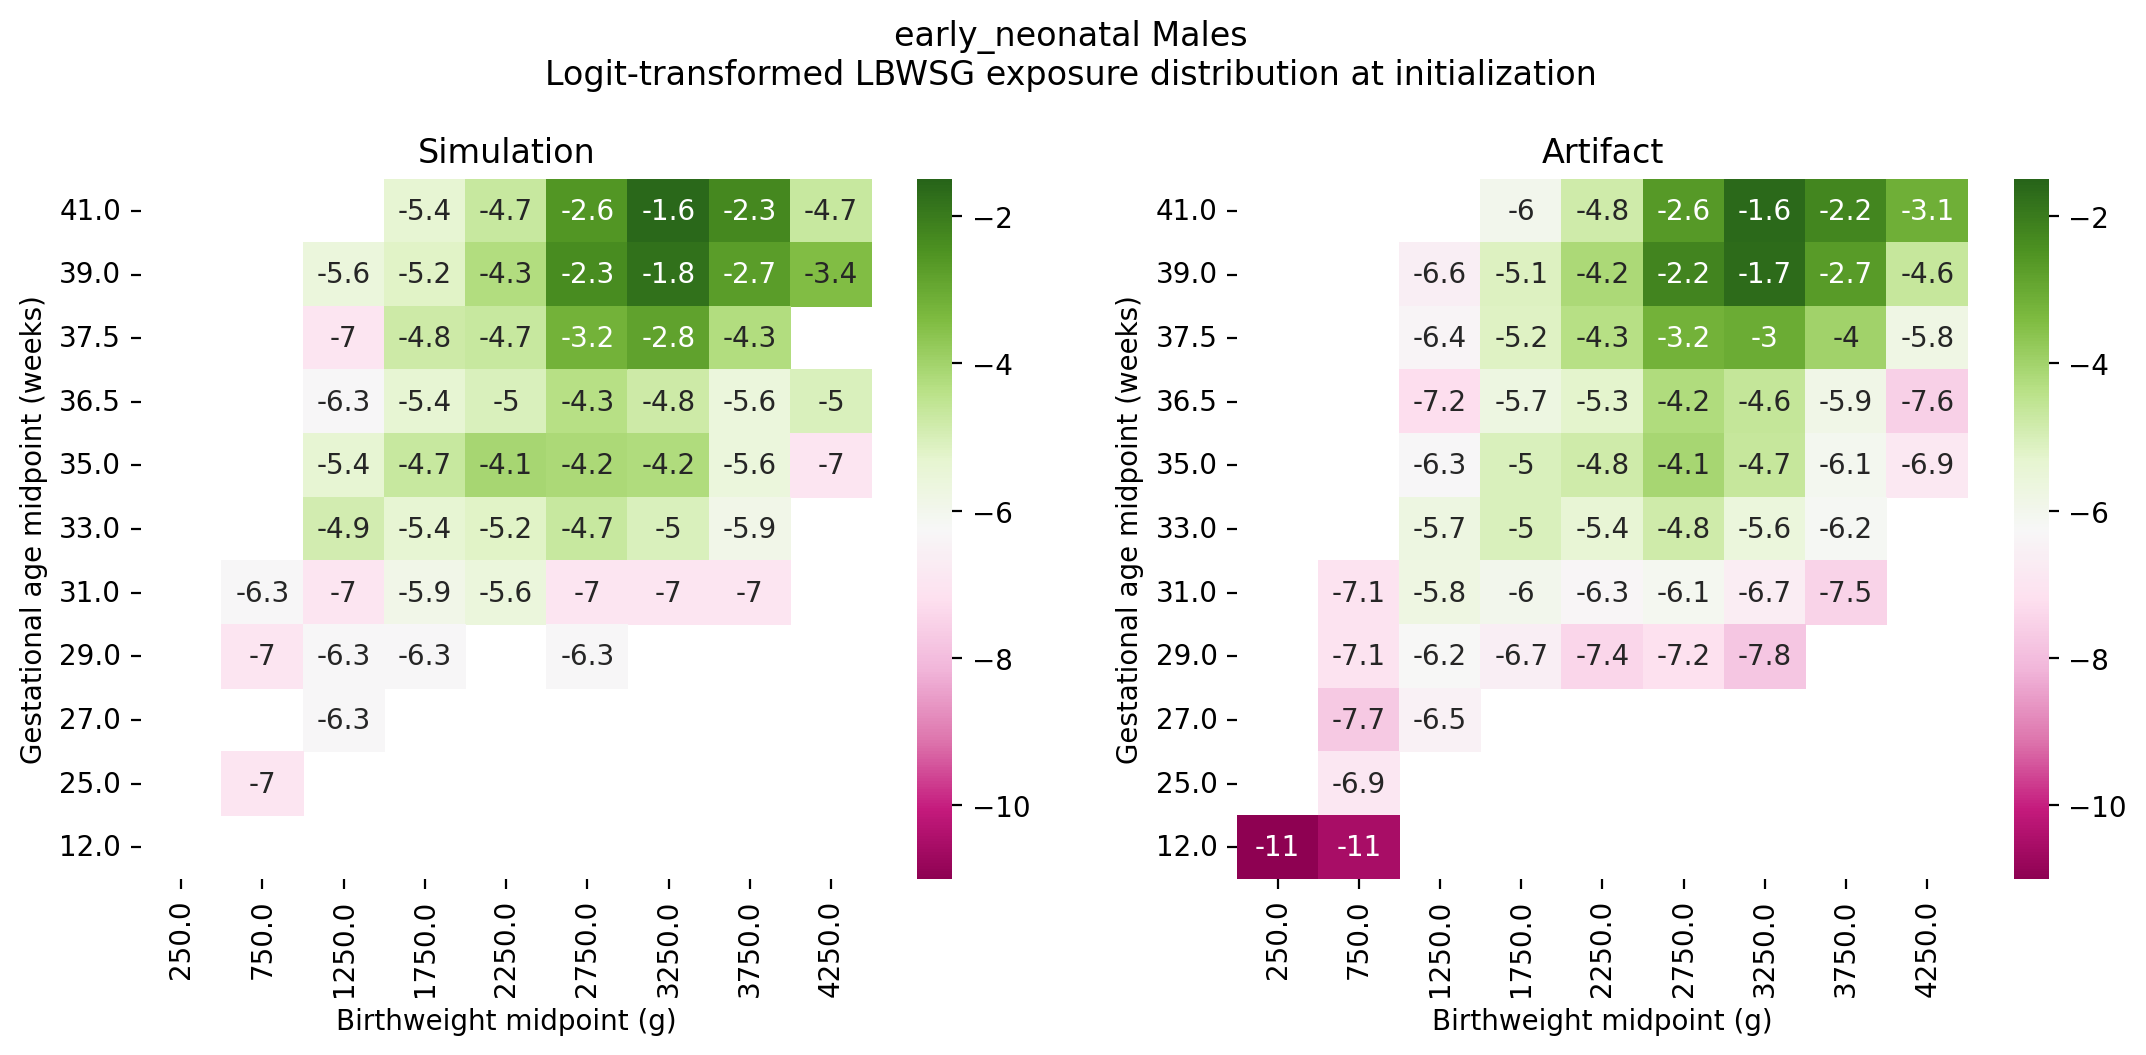

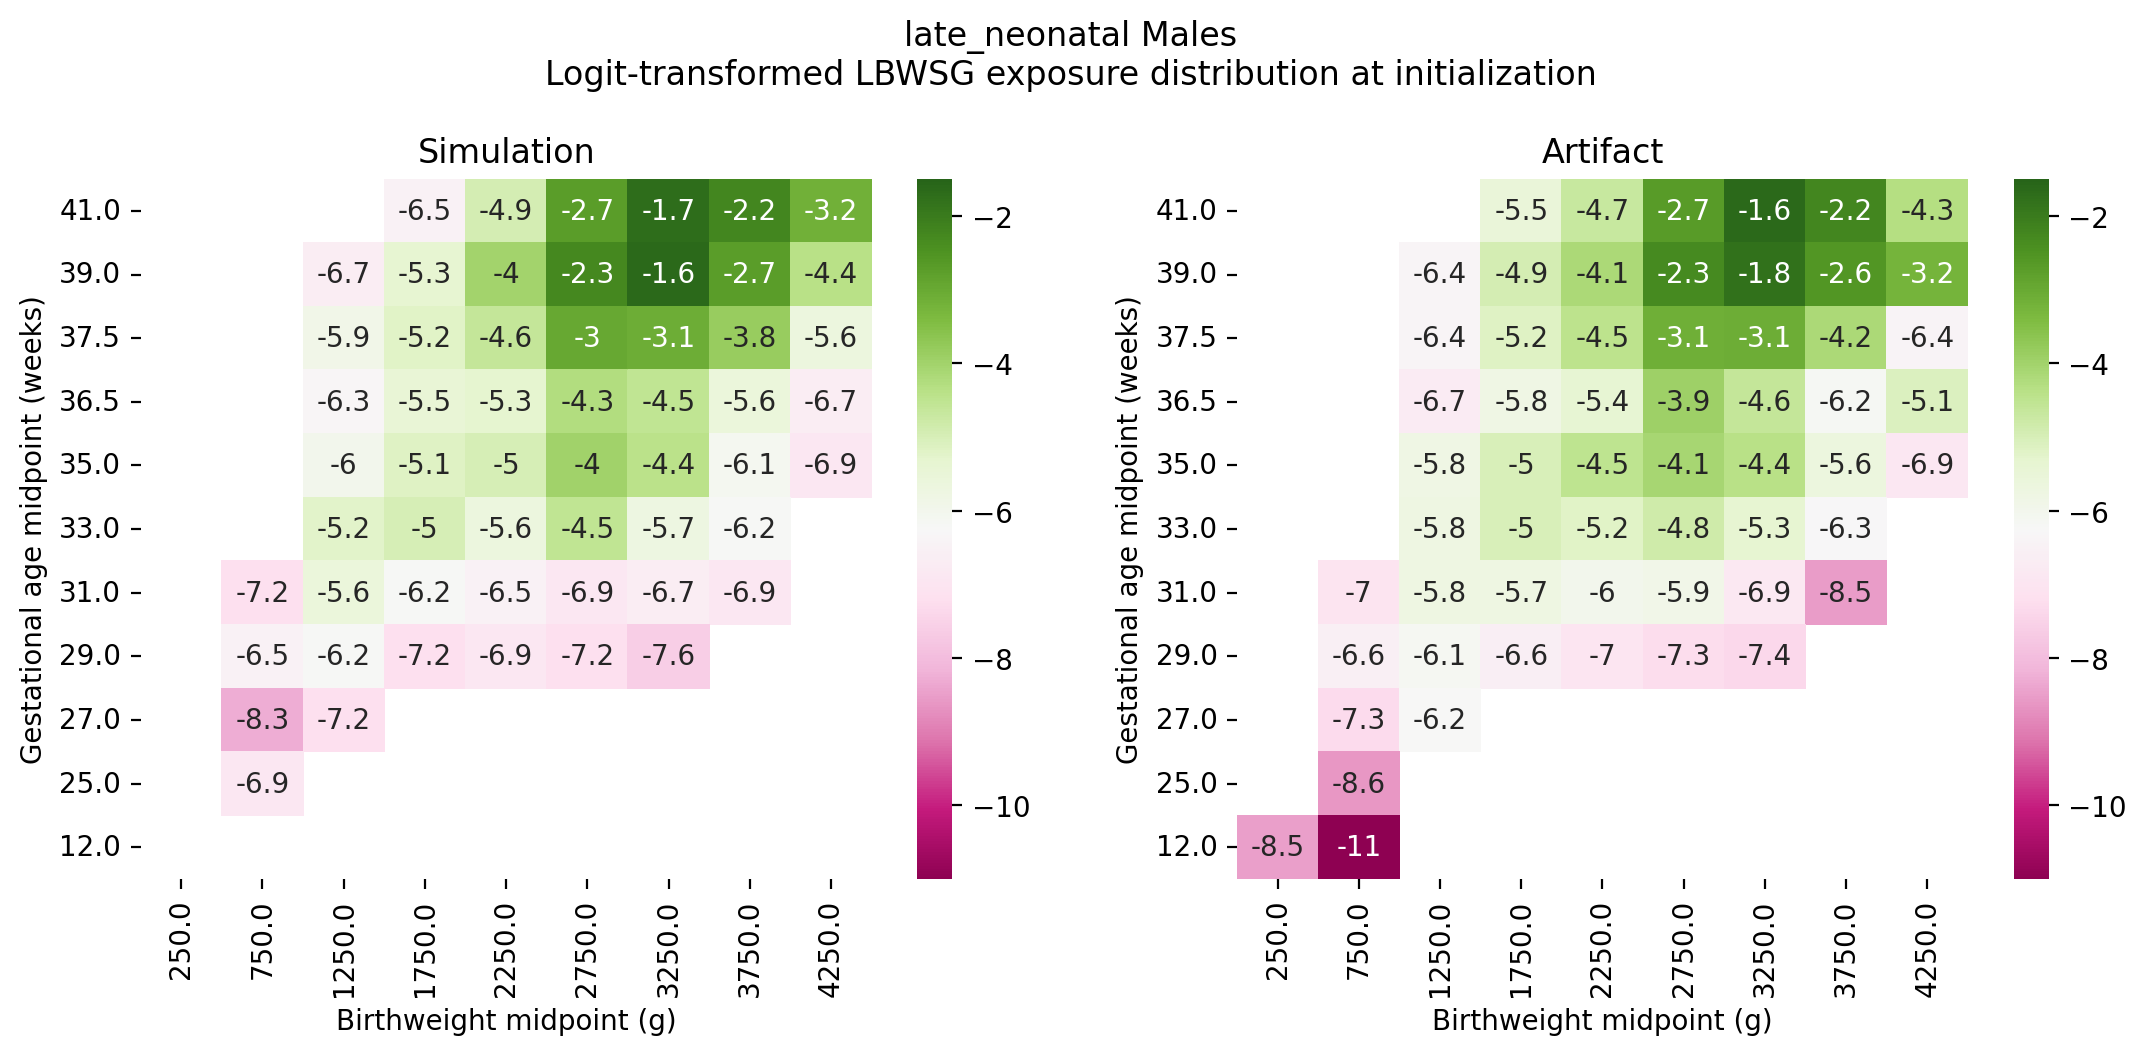

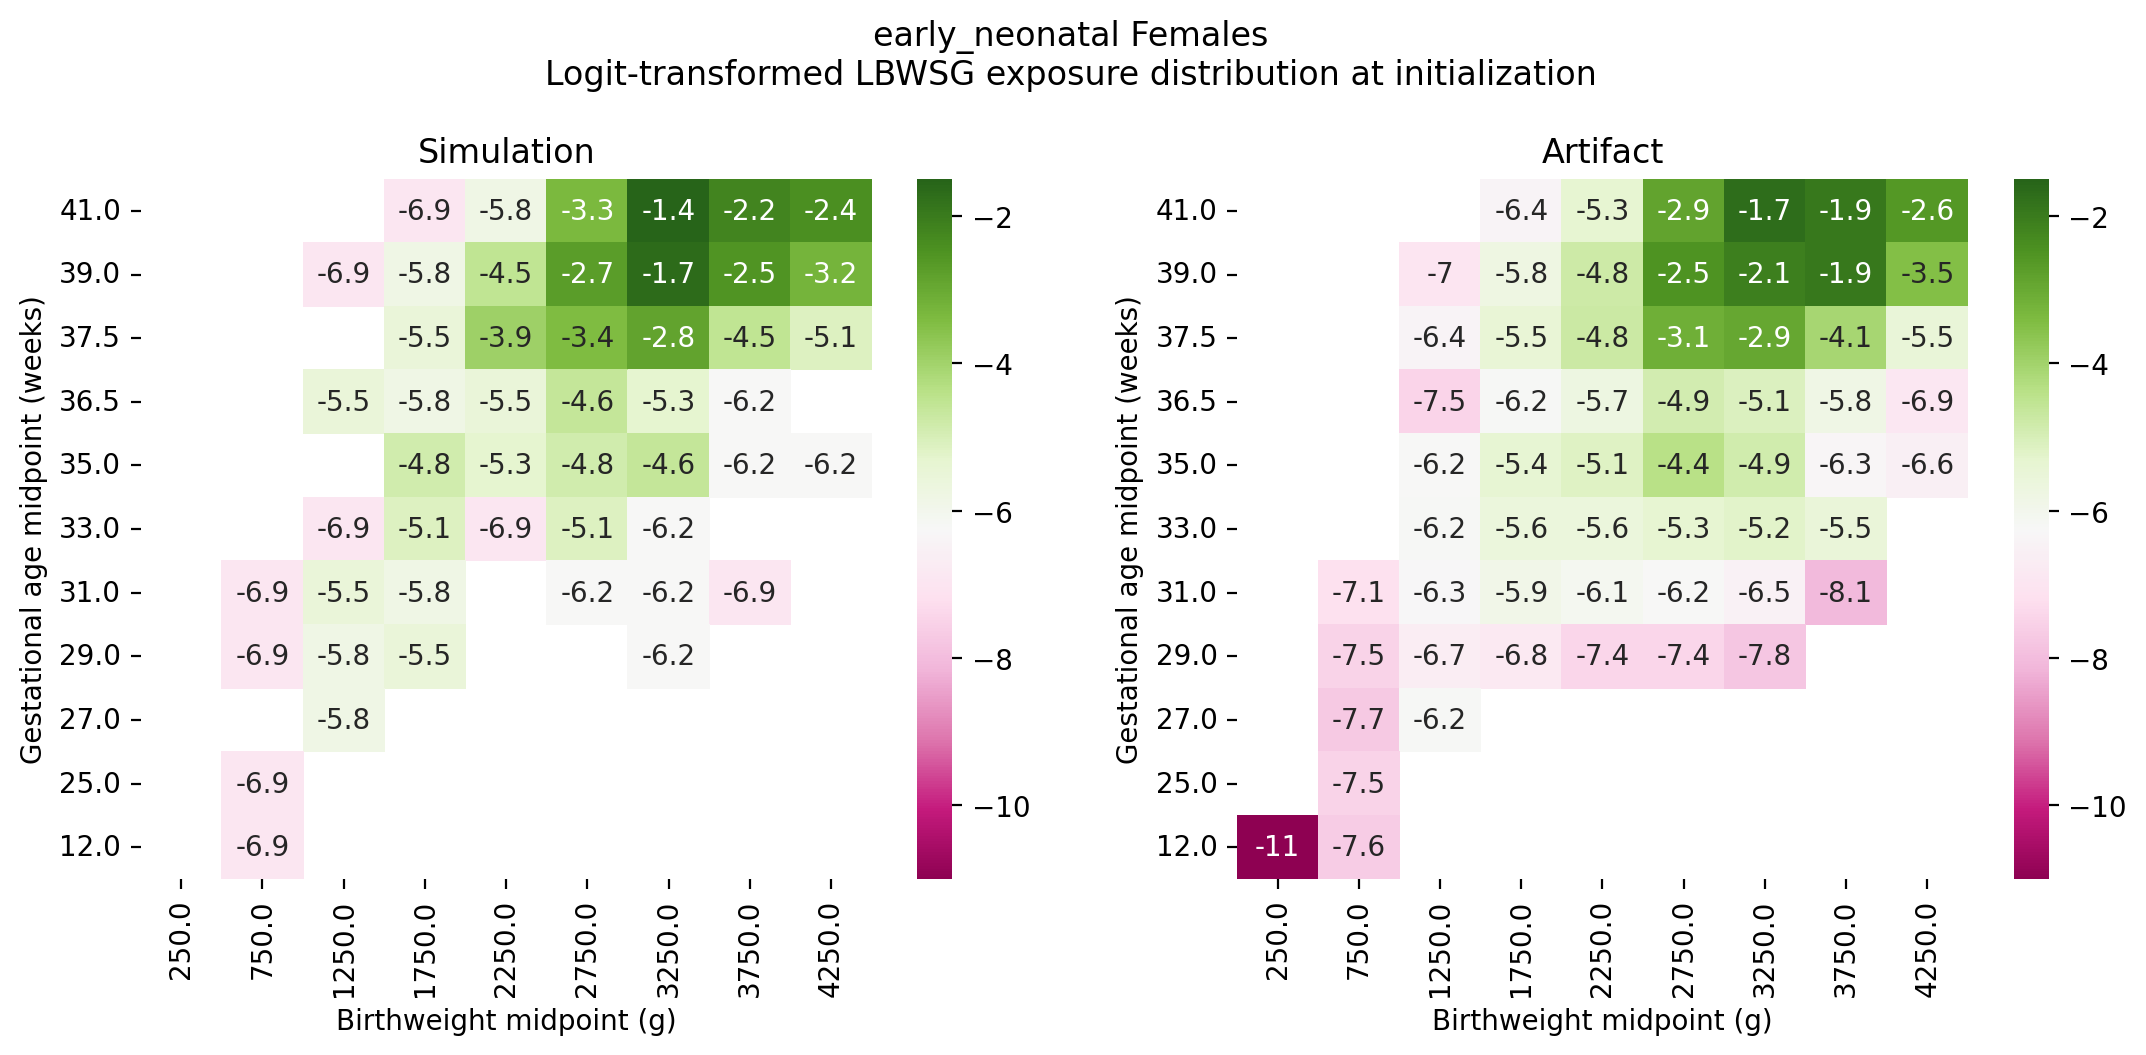

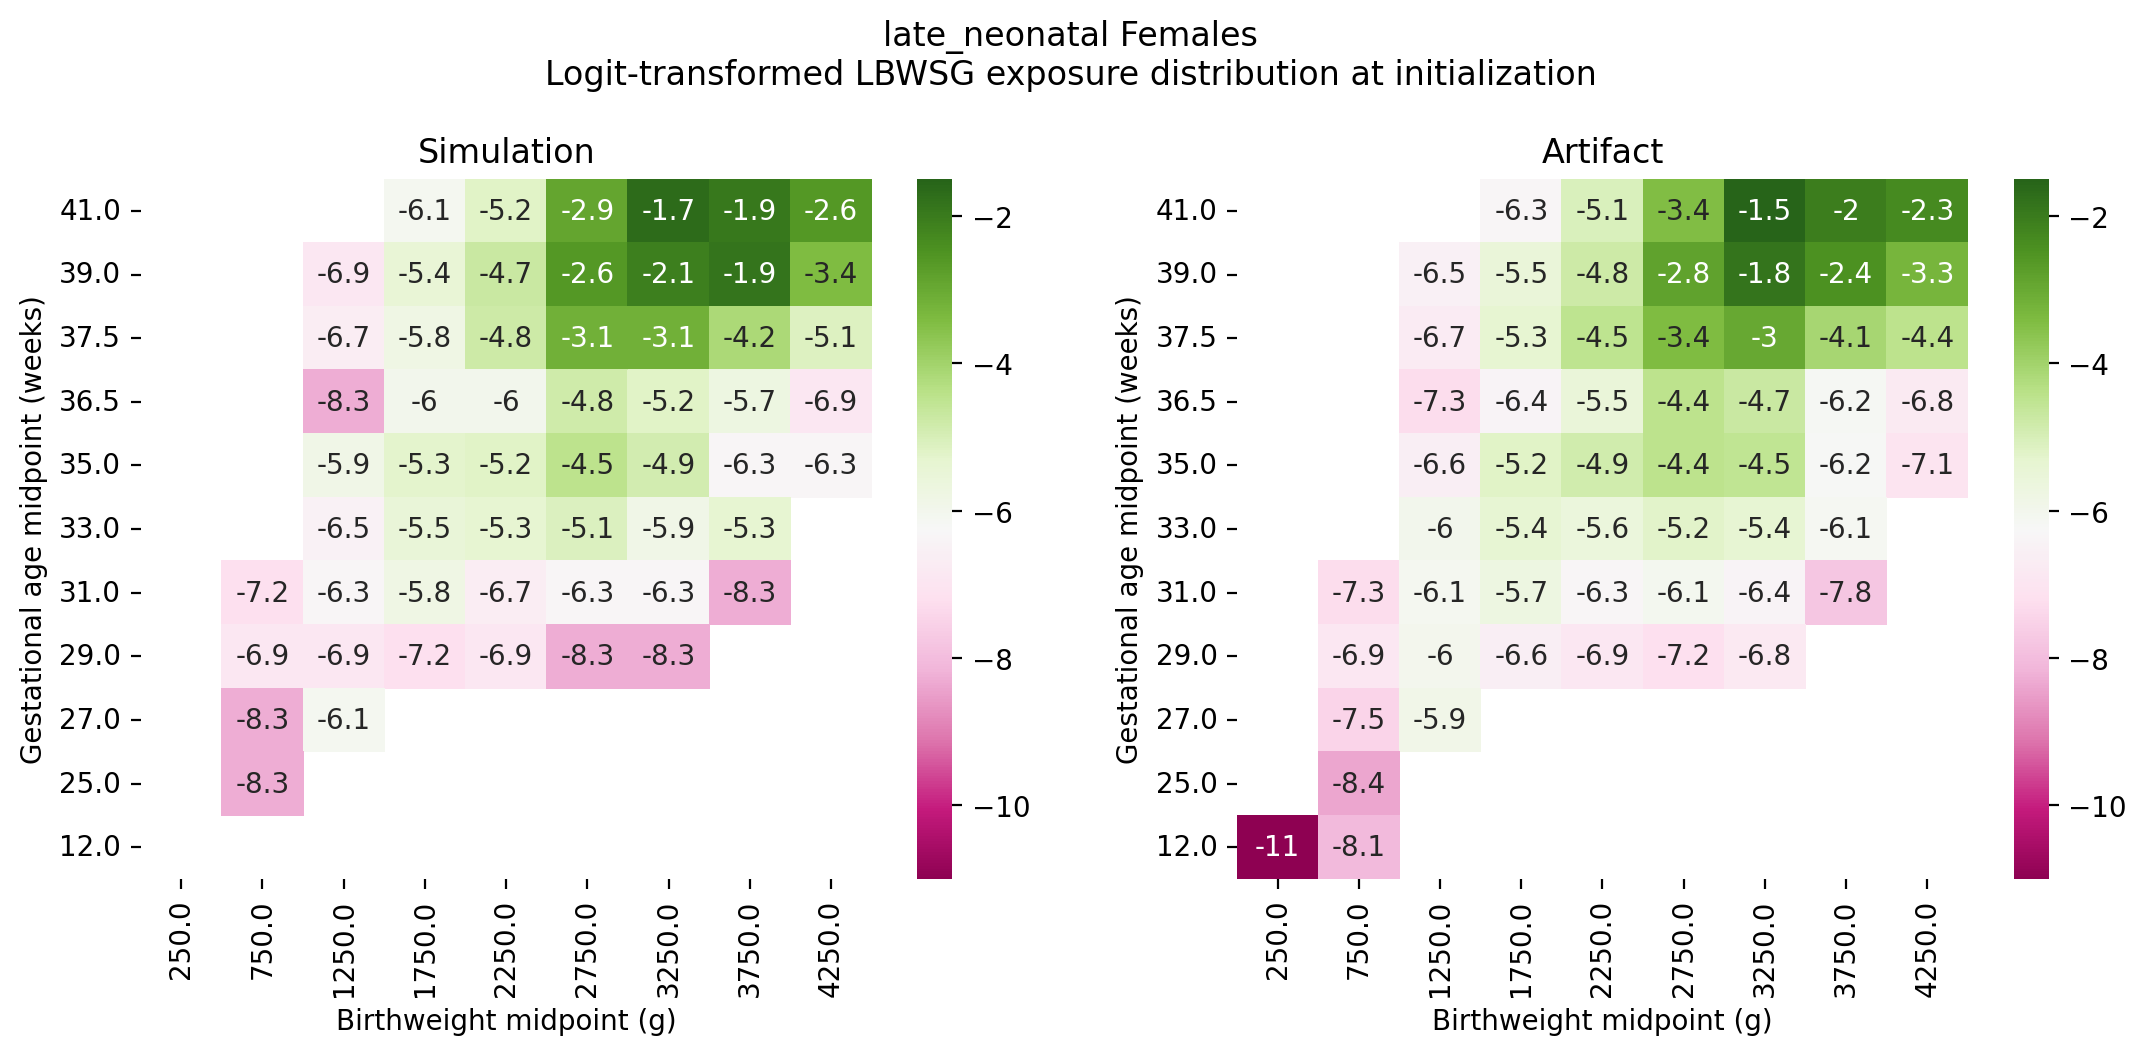

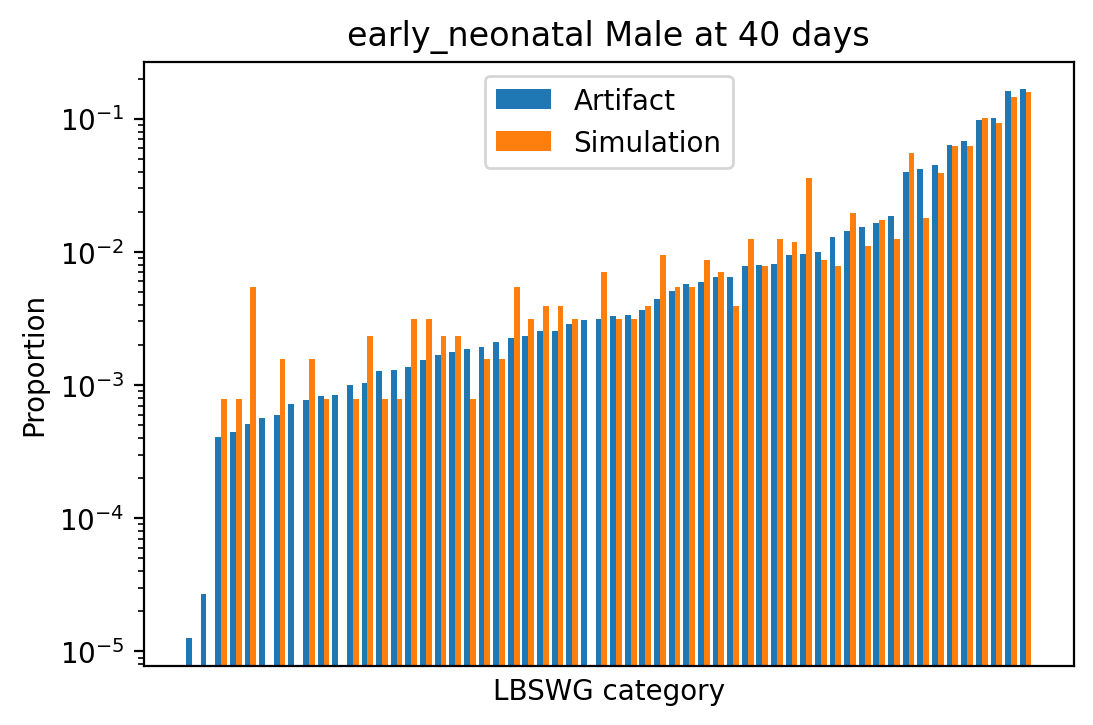

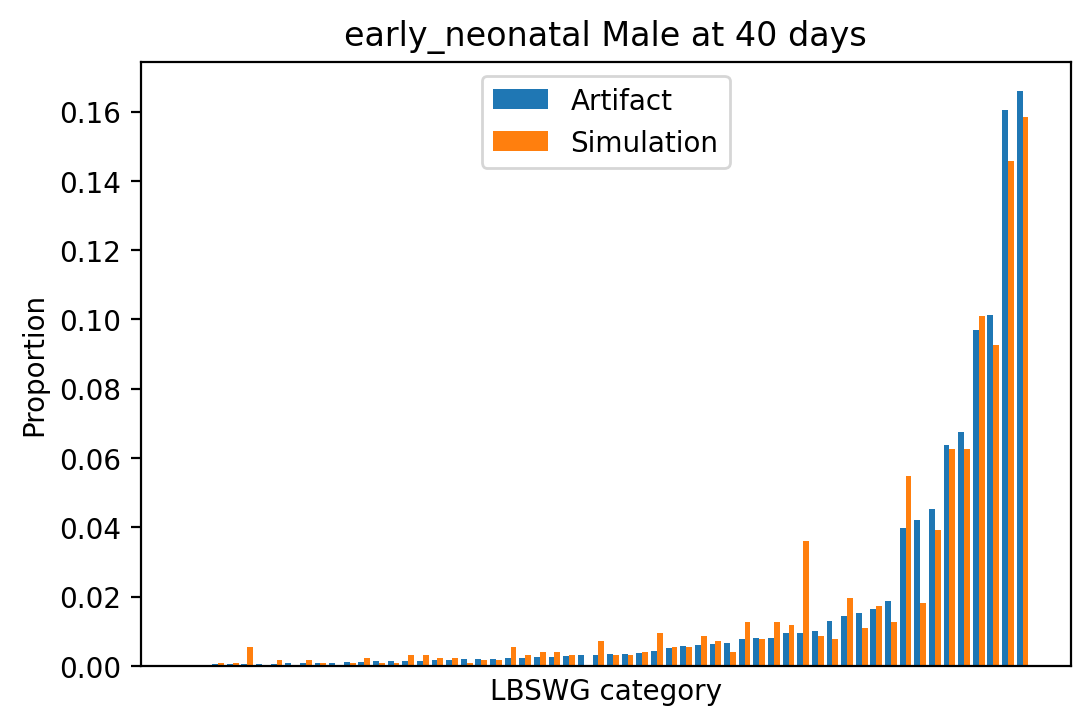

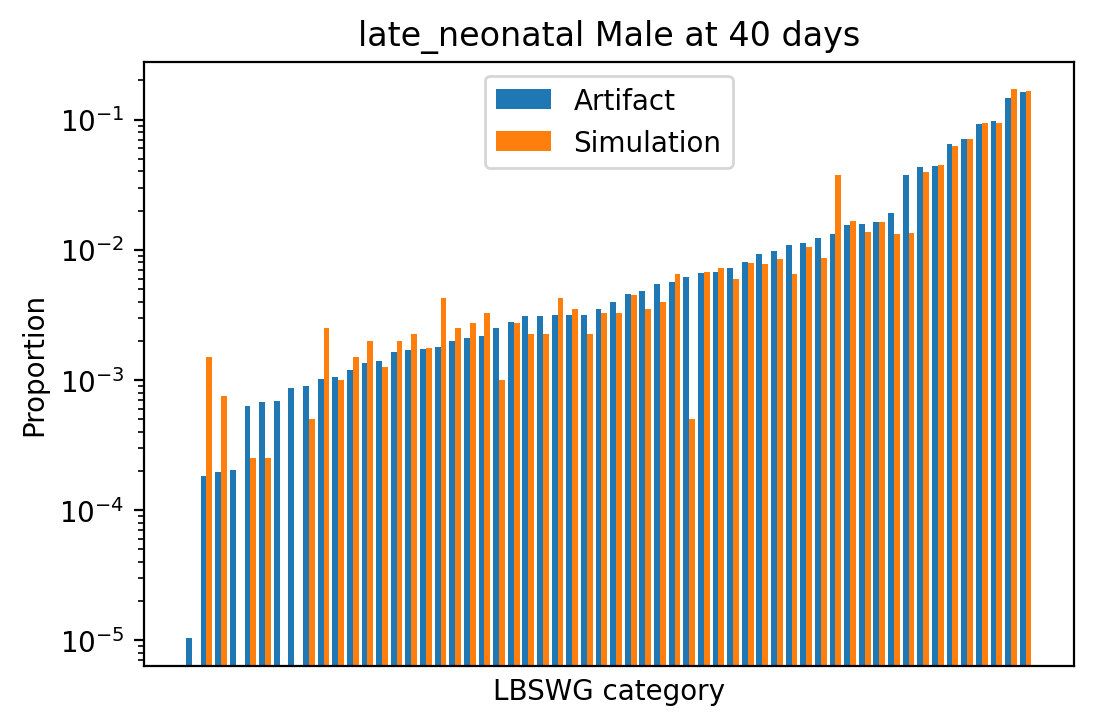

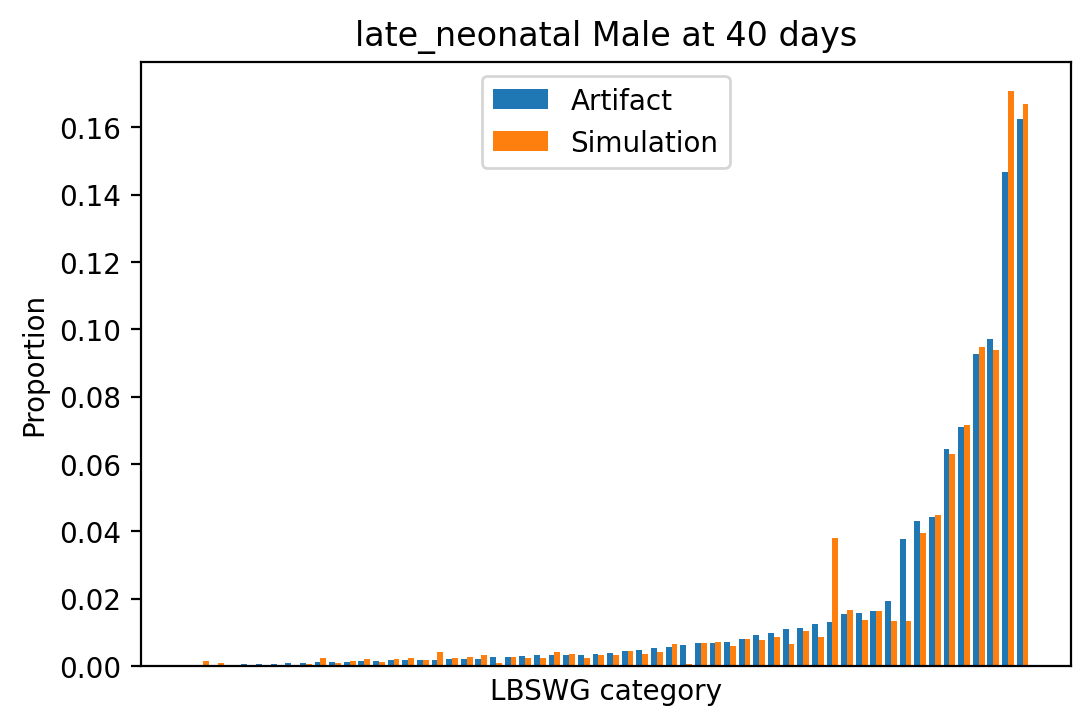

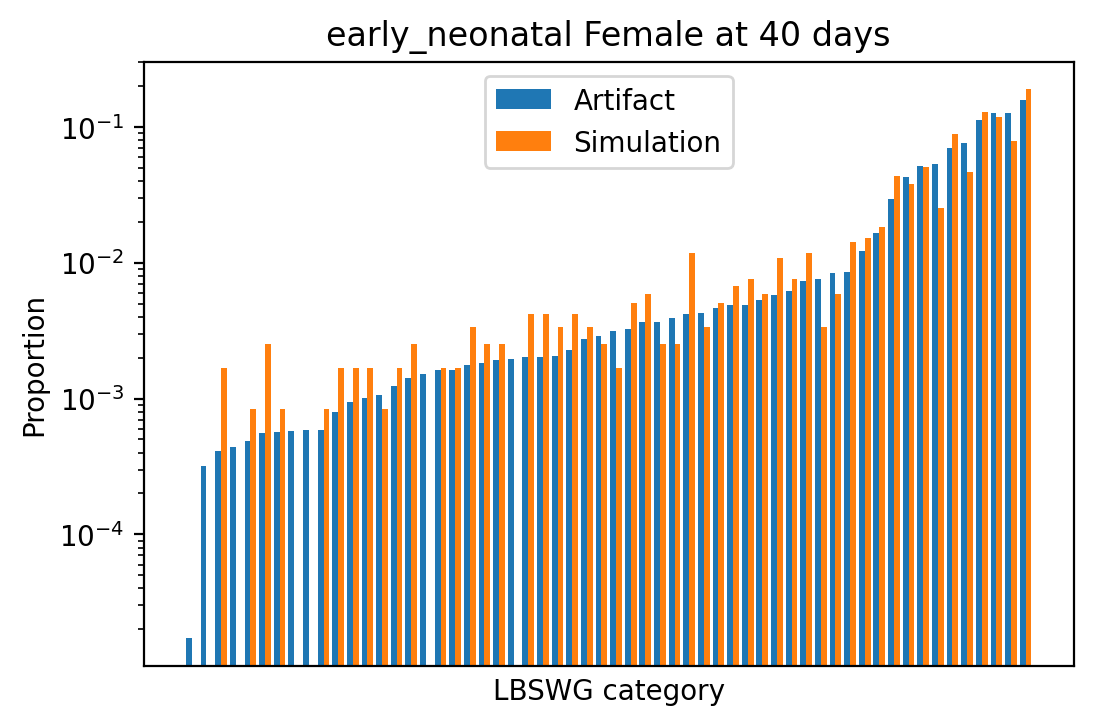

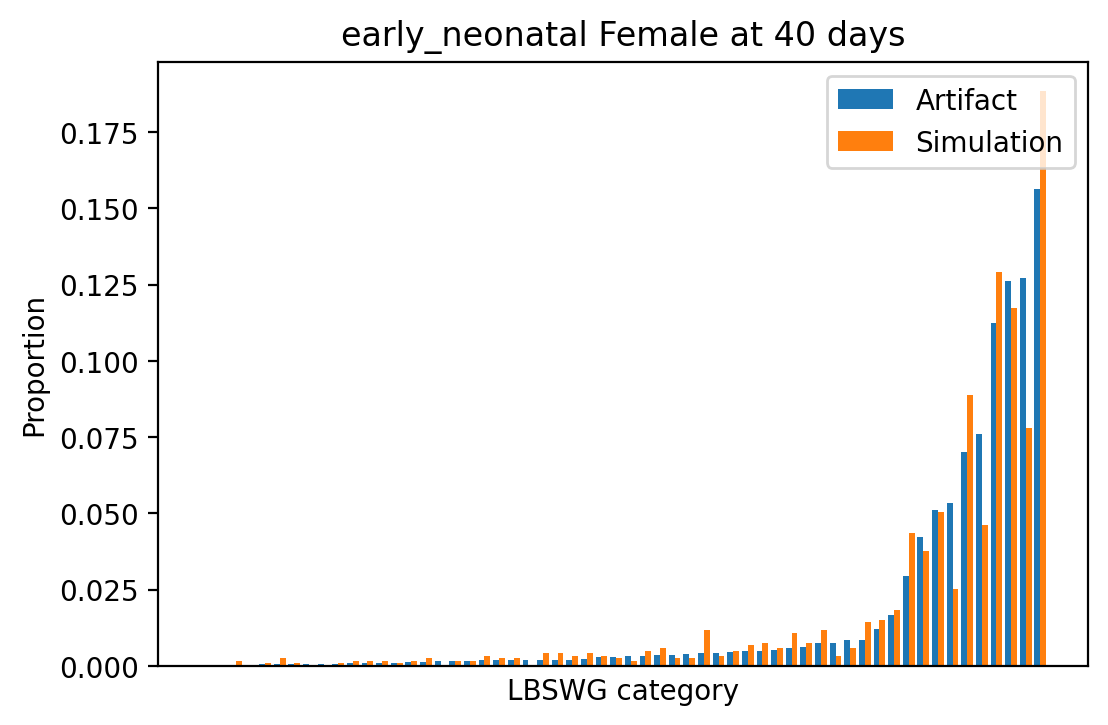

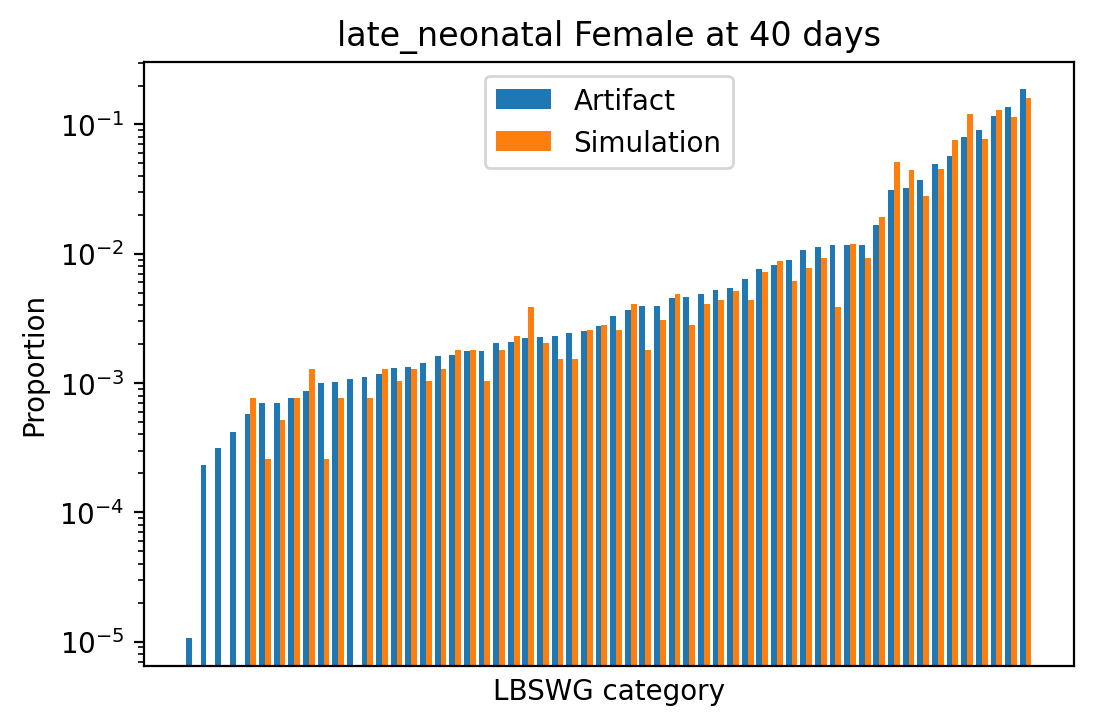

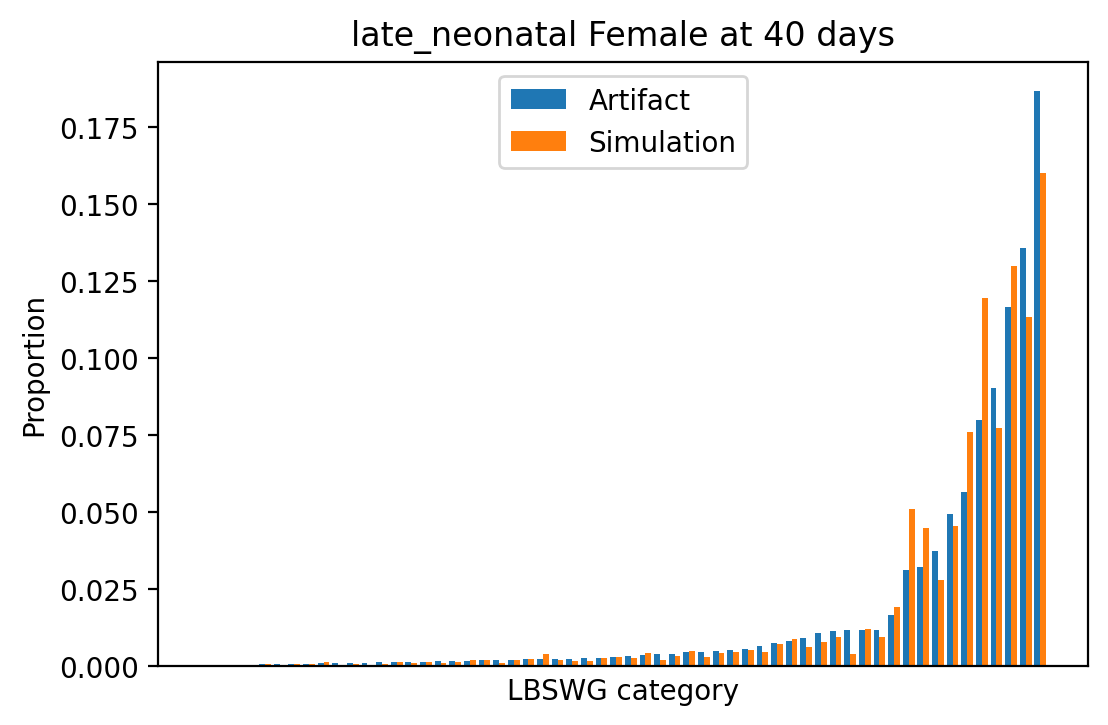

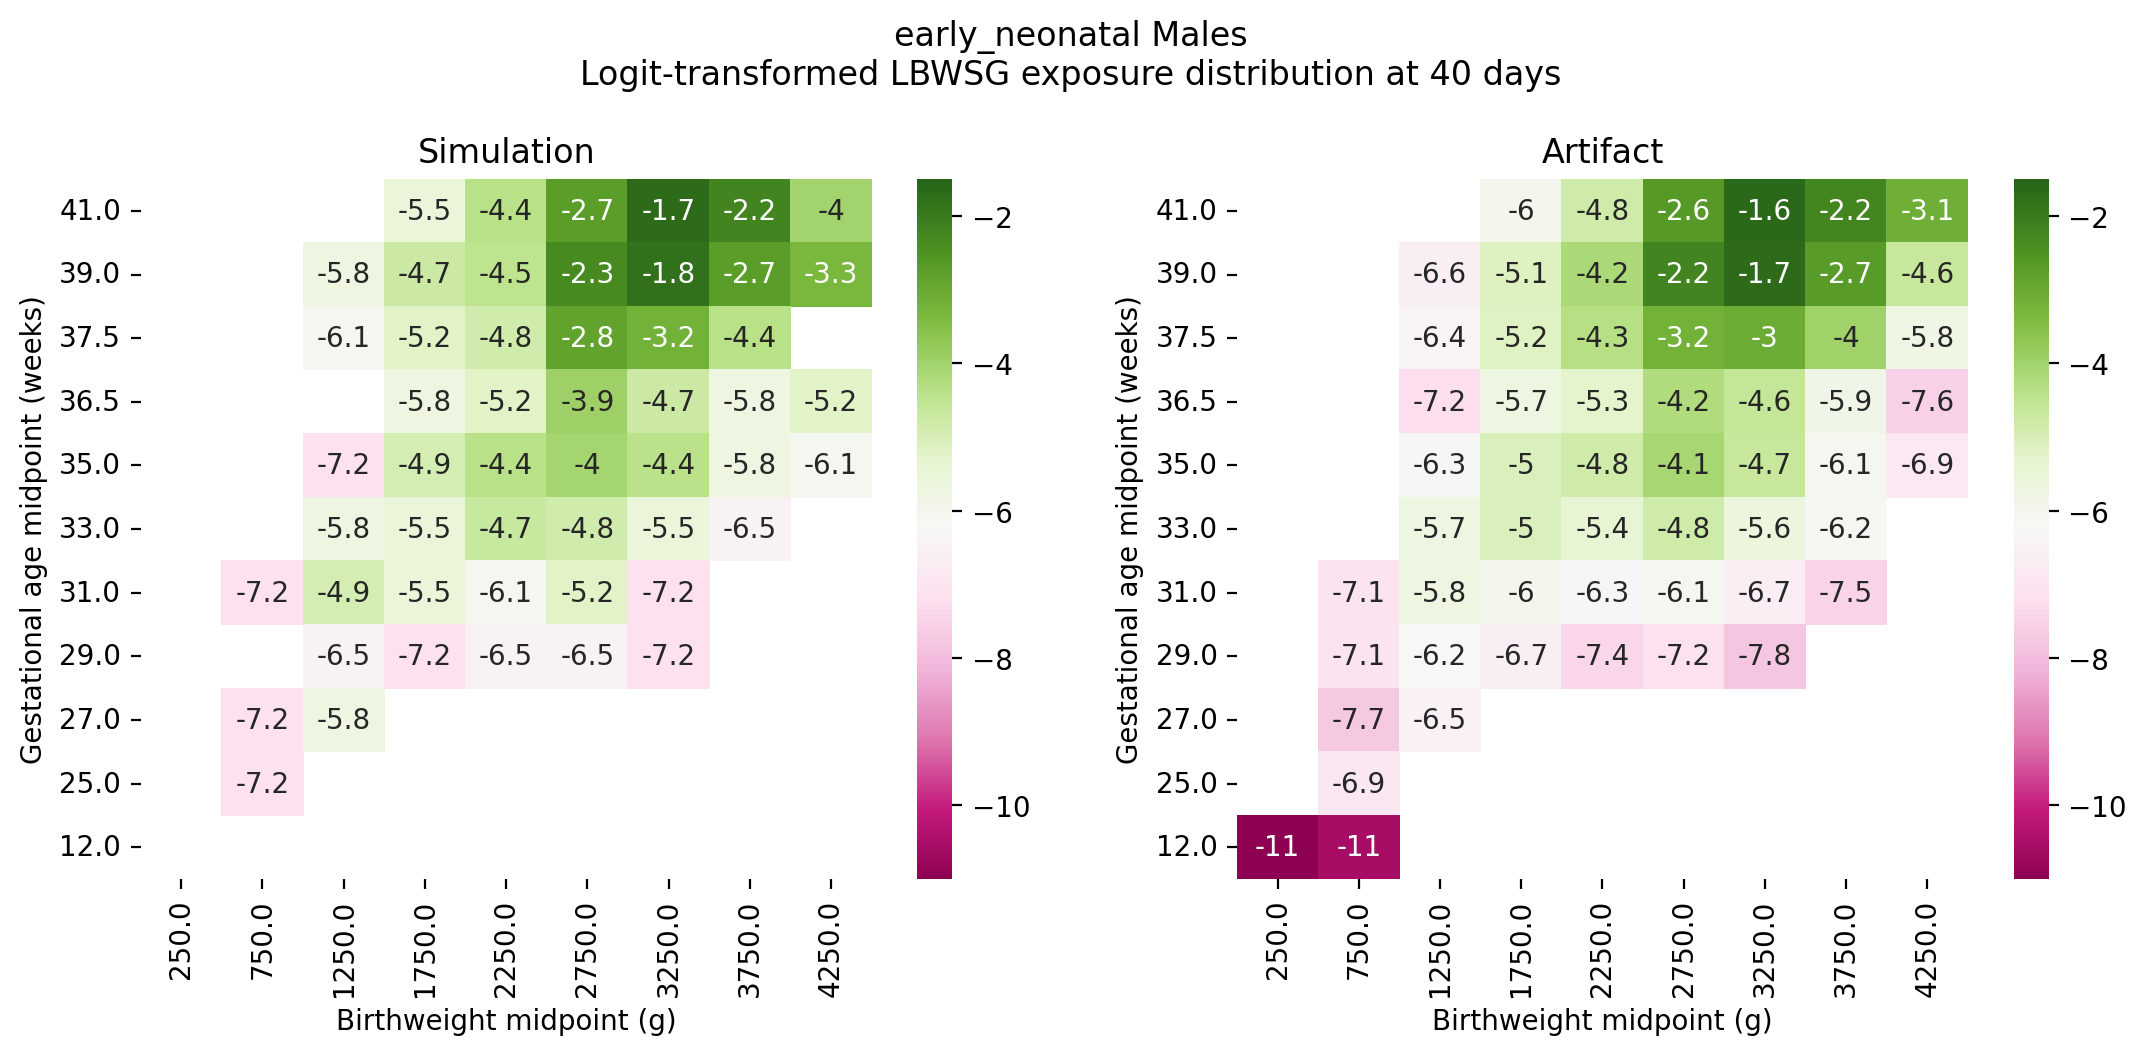

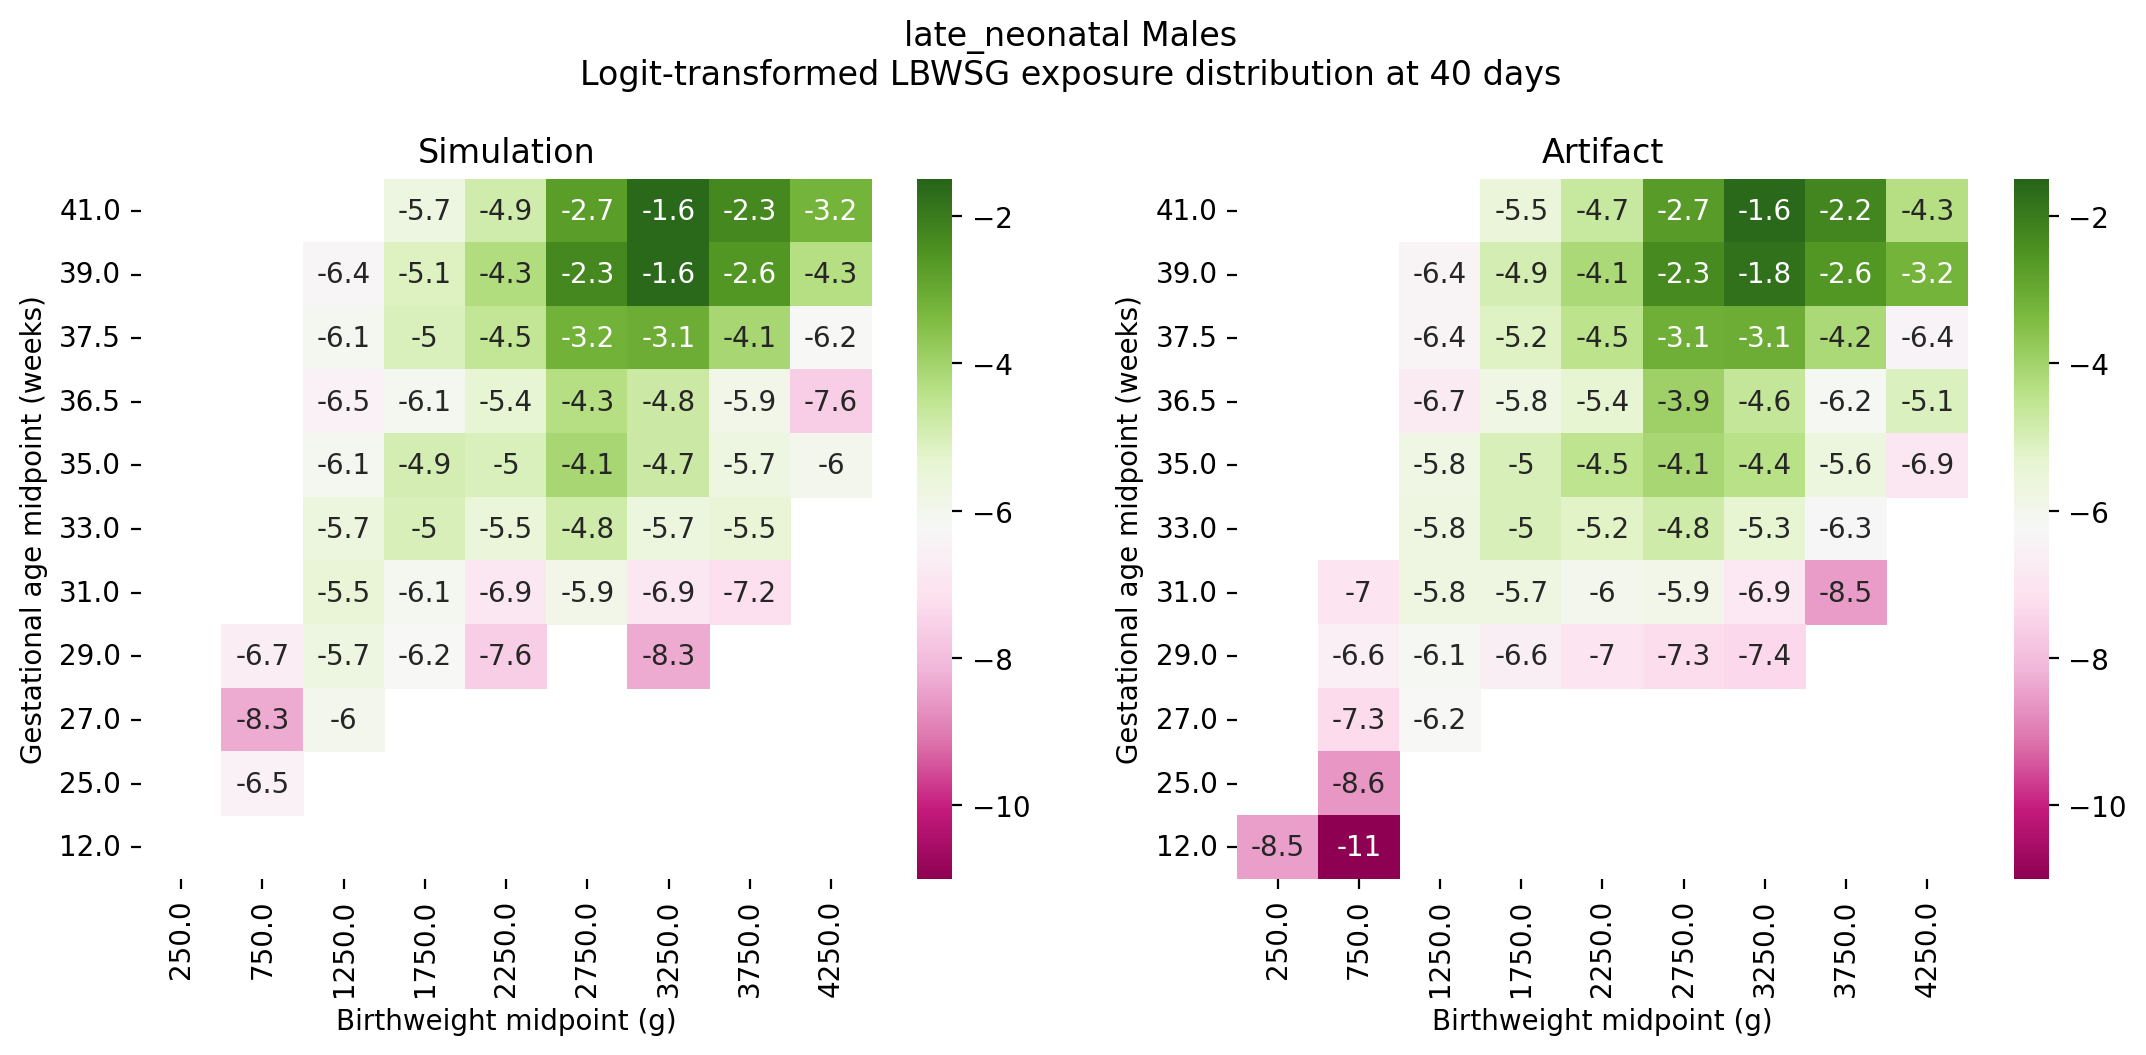

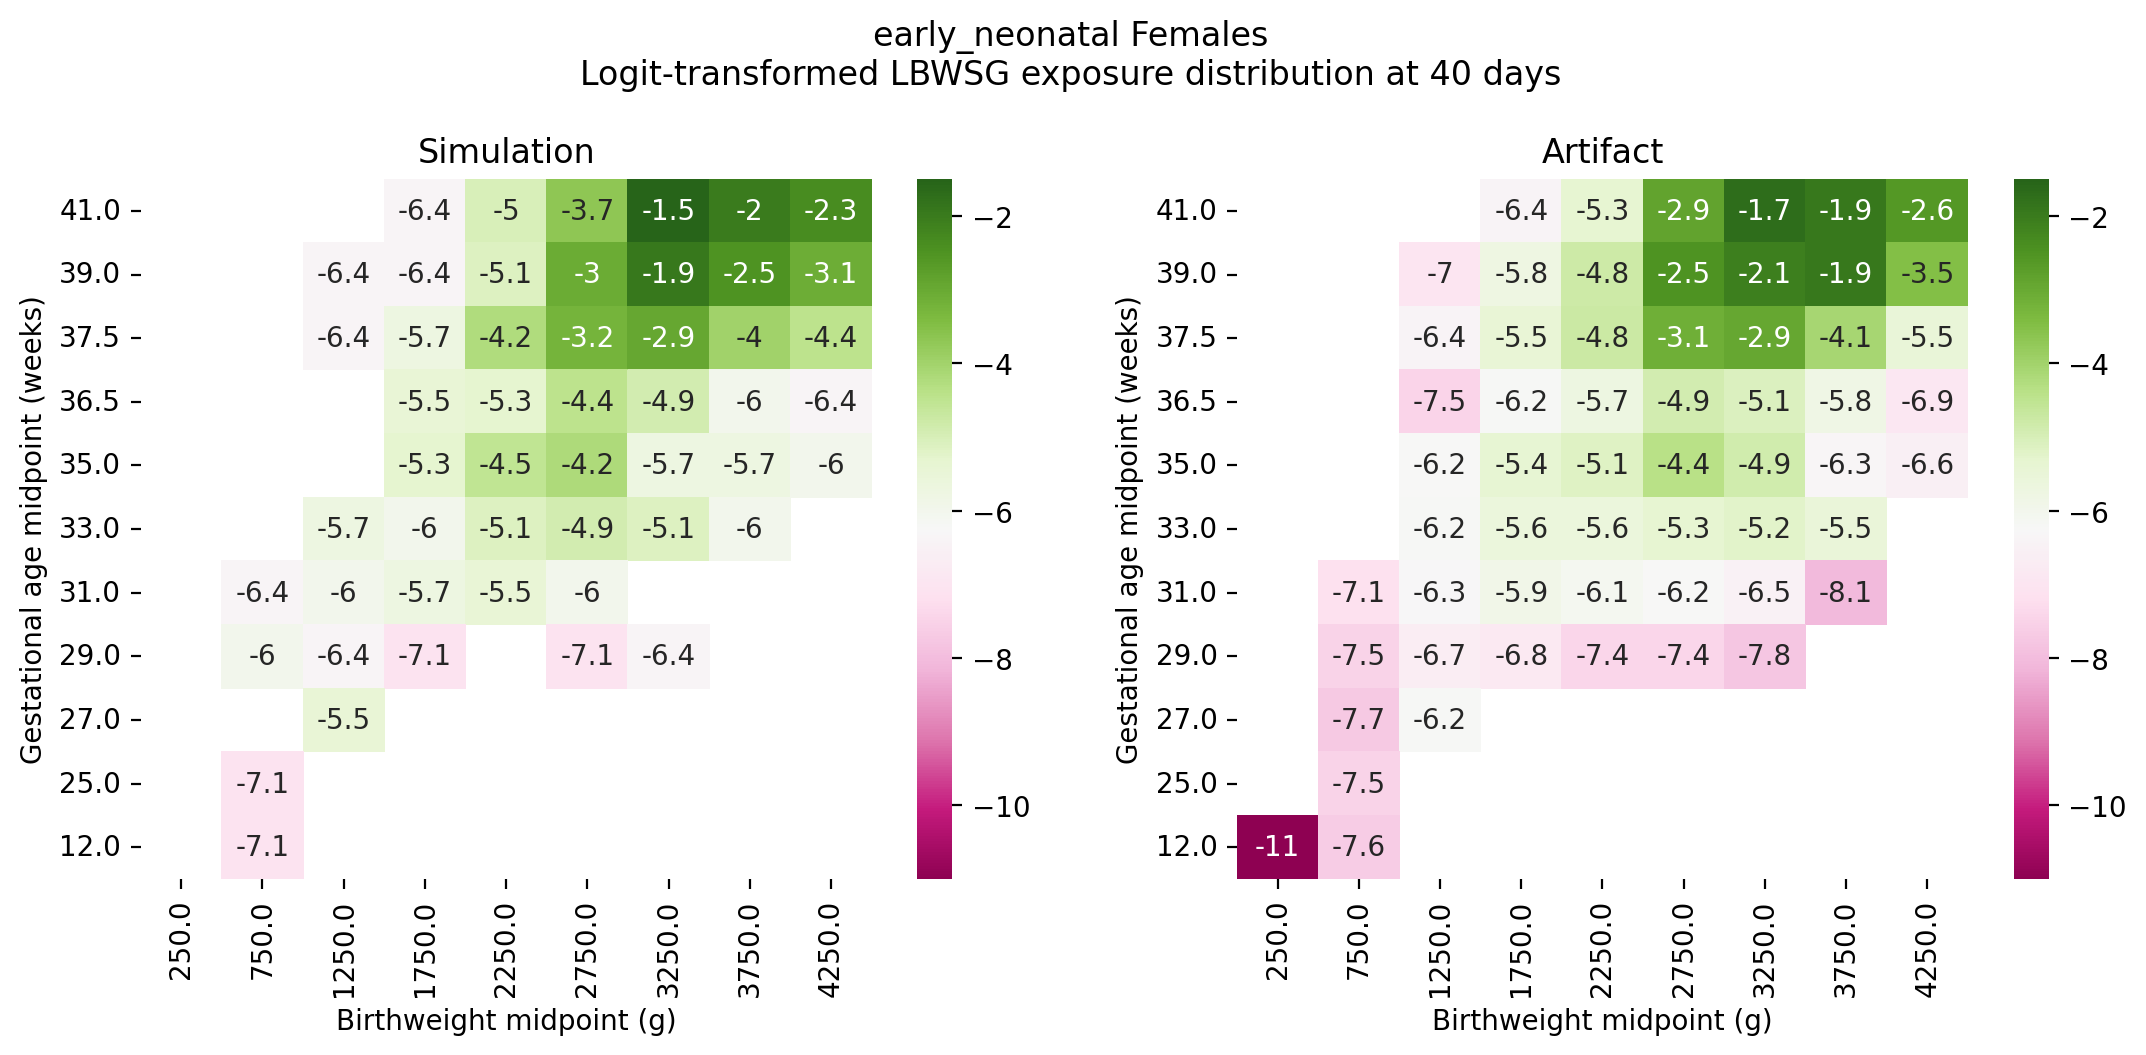

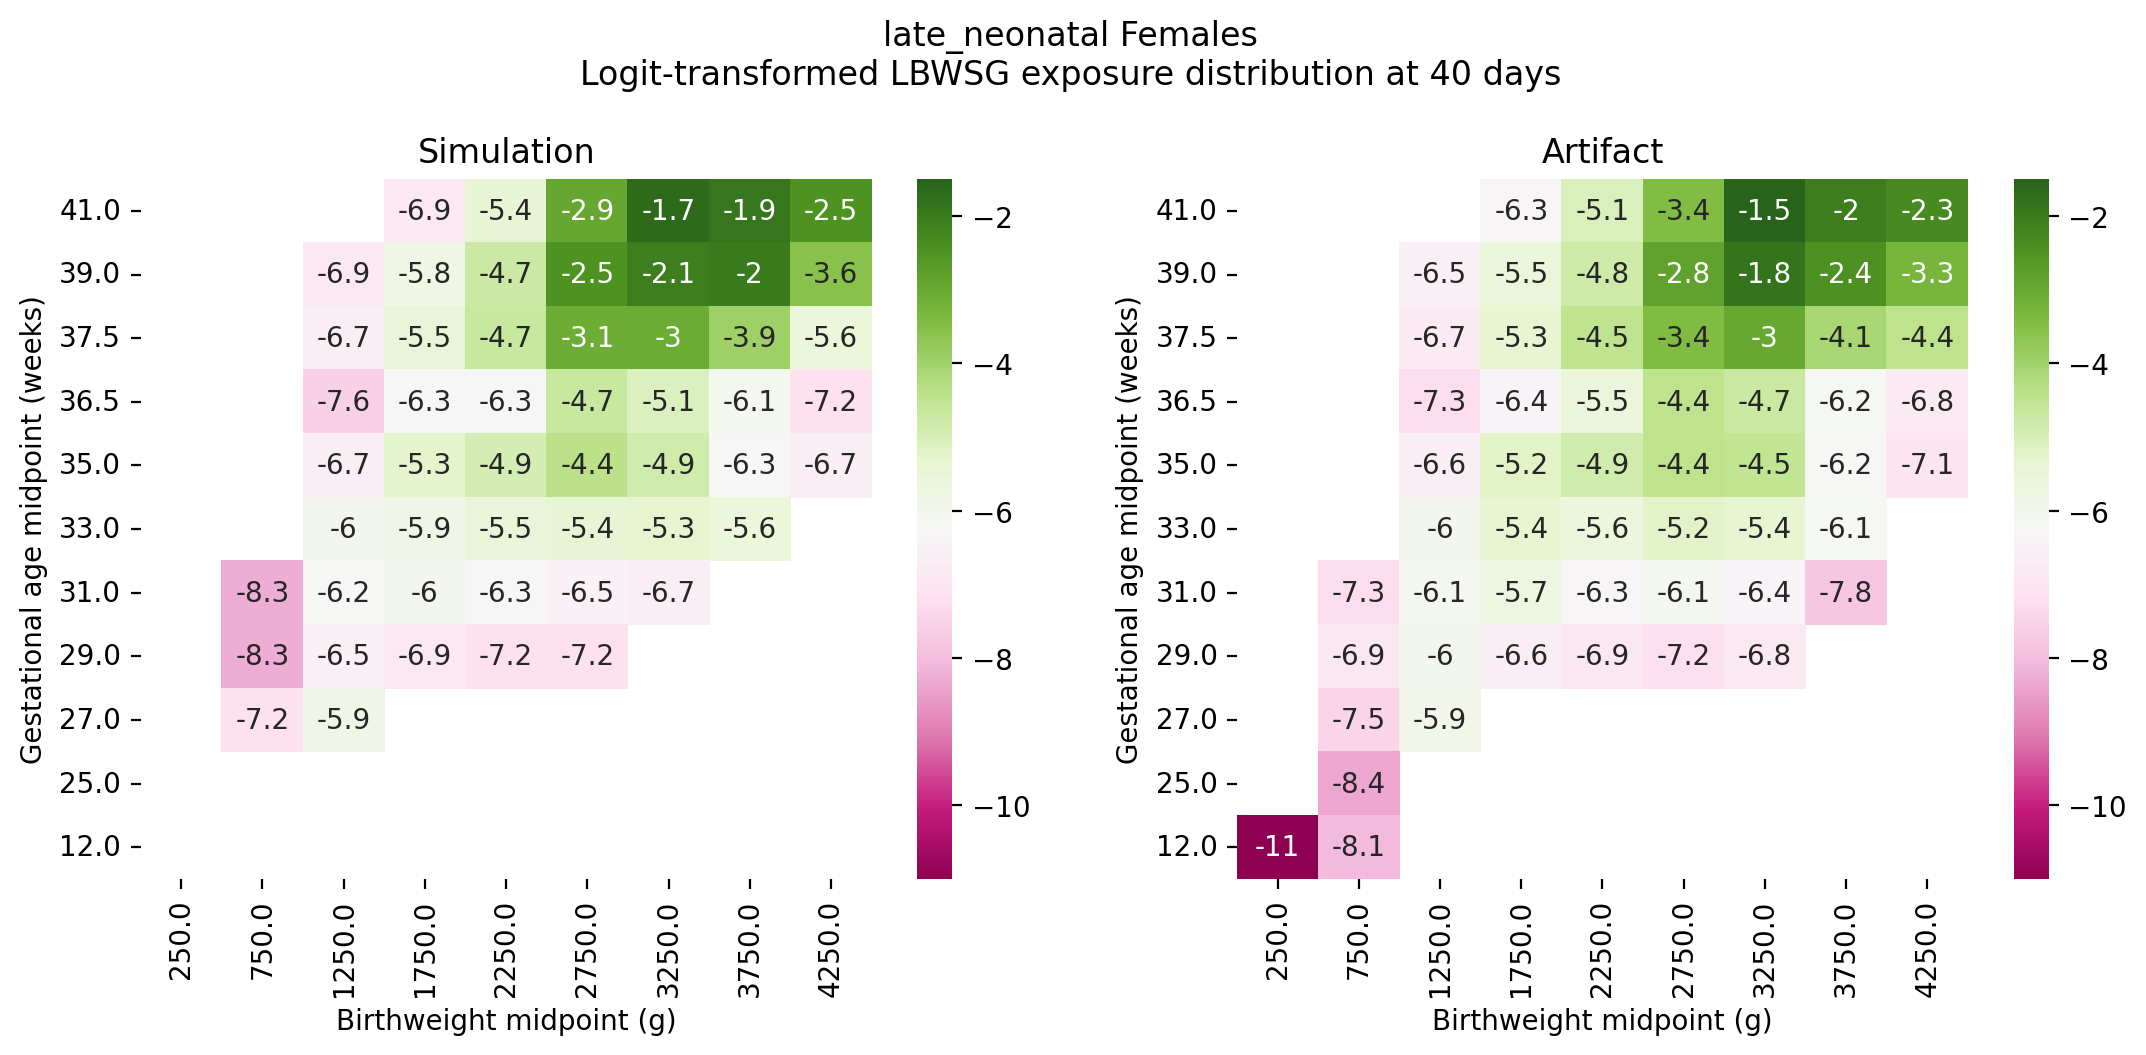

In [175]:
with PdfPages('model_5.0_lbwsg_exposure.pdf') as pdf:
    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            for log in [True,False]:
                bar_chart(sex, age_group, log=log)
                pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group)
            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            for log in [True,False]:
                bar_chart_40_days(sex, age_group, log=log)
                pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map_40_days(sex, age_group)
            pdf.savefig(bbox_inches='tight')